# **Tratativa auxiliar dos dados fornecido pela FIAP**

Para este projeto, foram disponibilizadas diversas bases, abrangendo os anos de 2020, 2021 e 2022, contendo informações sobre alunos, índices calculados, grade, visão dos professores, etc.

Como uma forma de auxiliar numa primeira tratativa de dados, a FIAP disponibilizou um notebook que tratava um CSV compilado dos três anos com as principais informações desses anos, como alunos, notas e critérios.





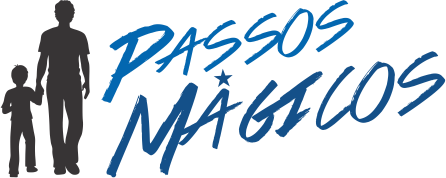

# Analisando os dados 🔎

###Links:


1.   Dicionário dos Dados: https://drive.google.com/file/d/1Z8Rs6SLicxMJUu_zwrYD399mPvs-djVb/view?usp=drive_link

2.   Fonte dos Dados (PEDE_PASSOS_DATASET_FIAP): https://drive.google.com/file/d/1io7twhaAET_idhoyREhyaOCuU3gGAgIa/view?usp=drive_link



In [511]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

In [512]:
# Primeiro importamos as bibliotecas que serão utilizadas para a tratativa dos dados e alguns plots iniciais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Após importar as bibliotecas, iremos agora chamar a fonte de dados e atribuí-la a um DataFrame

file_path = './PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

**Essa linha demonstra que o Aluno foi ingressado em 2022, e todas as outras colunas são nulas. Seria interessante criar para cada ano um dataset separado para início das análises.** 🤔

In [513]:
pd.DataFrame(df.loc[df['NOME'] == 'ALUNO-2']).transpose().T

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)


In [514]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [515]:
# df.info()

# Tivemos adição de colunas novas no dataset ao longo do tempo 🤔

In [516]:
len(df.columns[df.columns.str.contains('2020')])

18

In [517]:
df.columns[df.columns.str.contains('2020')]

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'ANOS_PM_2020',
       'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')

In [518]:
len(df.columns[df.columns.str.contains('2021')])

20

In [519]:
df.columns[df.columns.str.contains('2021')]

Index(['FASE_2021', 'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021'],
      dtype='object')

In [520]:
len(df.columns[df.columns.str.contains('2022')])

30

In [521]:
df.columns[df.columns.str.contains('2022')]

Index(['FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

# Funções reutilizáveis 🤓

In [522]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [523]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [524]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [525]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

In [526]:
df[['NOME','INDE_2020','PEDRA_2020','ANOS_PM_2020','INDE_2021','PEDRA_2021','SINALIZADOR_INGRESSANTE_2021','INDE_2022','ANO_INGRESSO_2022']].head()

,NOME,INDE_2020,PEDRA_2020,ANOS_PM_2020,INDE_2021,PEDRA_2021,SINALIZADOR_INGRESSANTE_2021,INDE_2022,ANO_INGRESSO_2022
0,ALUNO-1,7.883752,Ametista,2,7.319,Ametista,Ingressante,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,7.675509,2022.0
2,ALUNO-3,7.856389666666666,Ametista,2,7.021,Ametista,Veterano,NaN,NaN
3,ALUNO-4,5.076252,Quartzo,2,NaN,NaN,NaN,7.117065,2022.0
4,ALUNO-5,8.077085,Ametista,1,7.399,Ametista,Veterano,7.232336,2019.0


# DF - 2020




In [527]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [528]:
len(df_2020) # com NaN

1349

In [529]:
df_2020 = cleaning_dataset(df_2020)
len(df_2020)

728

In [530]:
# aluno que tem como INDE_2020 como D980 atrapalha na minha conversao desse campo para float
df_2020.loc[df_2020['INDE_2020'].str.contains('D980')]

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
1258,V202,ALUNO-1259,D108,D971,D207,D9600,D980,D9891/2,D9891/2A,D301,D302,NaN,D910,V920,D930,D940,D950,D960,D970


In [531]:
#decidi remover essa linha, pois nao agregava em nada
df_2020.drop(df_2020.index[df_2020['INDE_2020'].str.contains('D980')], inplace=True)

In [532]:
# mudar o tipo do campo INDE_2020 de str para float
df_2020['INDE_2020_TRATADO'] = df_2020['INDE_2020'].astype(float)


In [533]:
#MUDAR OS FORMATOS DOS CAMPOS DO TIPO DECIMAL PARA TRAZER SOMENTE 1 NUMERO DEPOIS DA VIRGULA COMO PADRÃO DOS ANOS POSTERIORES

df_2020['INDE_2020_TRATADO'] = df_2020['INDE_2020_TRATADO'].map('{:.1f}'.format)

In [534]:
# campos que identifiquei serem necessarios mudar para float
# IAA_2020, IPS_2020, IDA_2020, IPP_2020, IPV_2020
df_2020['IAA_2020_TRATADO'] = df_2020['IAA_2020'].astype(float)
df_2020['IPS_2020_TRATADO'] = df_2020['IPS_2020'].astype(float)
df_2020['IDA_2020_TRATADO'] = df_2020['IDA_2020'].astype(float)
df_2020['IPP_2020_TRATADO'] = df_2020['IPP_2020'].astype(float)
df_2020['IPV_2020_TRATADO'] = df_2020['IPV_2020'].astype(float)


In [535]:
df_2020['IAA_2020_TRATADO'] = df_2020['IAA_2020_TRATADO'].map('{:.2f}'.format)
df_2020['IPS_2020_TRATADO'] = df_2020['IPS_2020_TRATADO'].map('{:.2f}'.format)
df_2020['IDA_2020_TRATADO'] = df_2020['IDA_2020_TRATADO'].map('{:.2f}'.format)
df_2020['IPP_2020_TRATADO'] = df_2020['IPP_2020_TRATADO'].map('{:.2f}'.format)
df_2020['IPV_2020_TRATADO'] = df_2020['IPV_2020_TRATADO'].map('{:.2f}'.format)


In [536]:
df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2


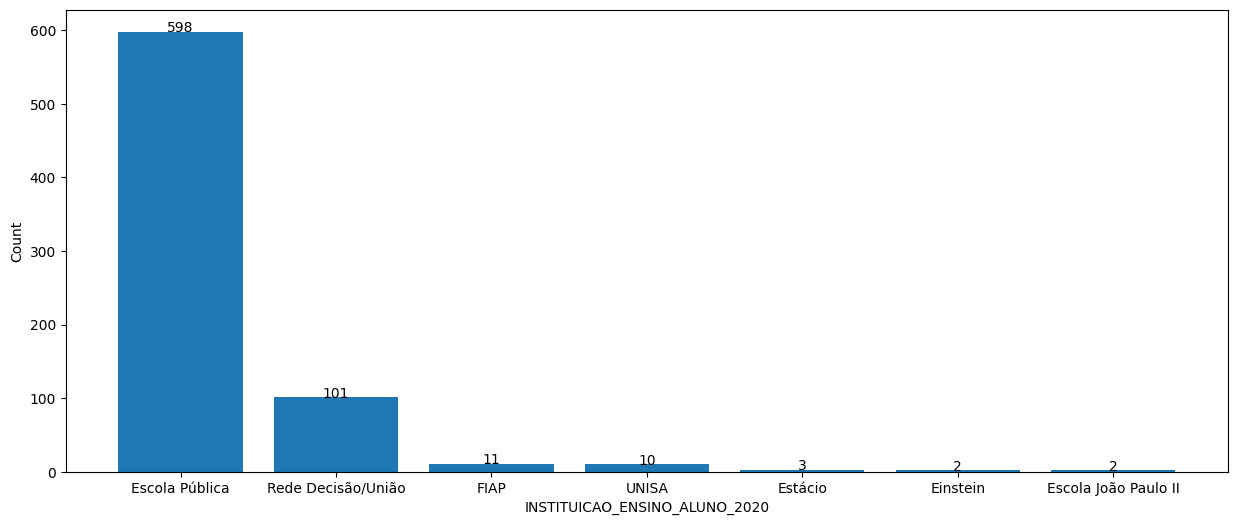

In [537]:
plot_exact_counter(size=(15, 6), x='INSTITUICAO_ENSINO_ALUNO_2020', y=df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts(), df=df_2020)

In [538]:
# alunos da rede Fiap # FASE 8 -> UNIVERSITARIOS
df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'FIAP'").shape

(11, 25)

In [539]:
df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'UNISA'").shape

(10, 25)

In [540]:
df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'Estácio'").shape

(3, 25)

*em 2020, dos 728 alunos, 598 são de escola publica, o que equivale a aproximadamente 82.14% do total de alunos da base*

# **INDE** - Indice do Desenvolvimento Educacional – Metrica de Processo Avaliativo Geral do Aluno;
####Dado pela Ponderaçao dos indicadores: IAN, IDA, IEG, IAA, IPS, IPP e IPV em 2020

#### **IAA** - Indicador de AutoAvaliçao       – Media das Notas de Auto Avaliaça o do Aluno em 2020
#### **IEG** - Indicador de Engajamento        – Media das Notas de Engajamento do Aluno em 2020
#### **IPS** - Indicador Psicossocial          – Media das Notas Psicossociais do Aluno em 2020
#### **IDA** - Indicador de Aprendizagem       - Media das Notas do Indicador de Aprendizagem
#### **IPP** - Indicador Psicopedagogico       – Media das Notas Psico Pedago gicas do Aluno em 2020
#### **IPV** - Indicador de Ponto de Virada    – Media das Notas de Ponto de Virada do Aluno em 2020
#### **IAN** - Indicador de Adequaçao ao Nível – Media das Notas de Adequaça o do Aluno ao ní vel atual em 2020

#Classificaçao do Aluno baseado no numero do INDE, o conceito de classificaça o e dado por:


*   **Quartzo** – 2,405 a 5,506 - #FFC0CB (rosa claro)
*   **Agata** – 5,506 a 6,868 - #A52A2A (marrom, uma das cores comuns)
*   **Ametista** – 6,868 a 8,230 - #9966CC (roxo)
*   **Topazio** – 8,230 a 9,294 - #007FFF (azul)





In [541]:
# QUANTOS DESSES ALUNOS SE DERAM BEM? POR INSTITUICAO DE ENSINO (escola publica)

df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'Escola Pública'")['PEDRA_2020'].value_counts()


,count
PEDRA_2020,
Ametista,258
Ágata,153
Quartzo,116
Topázio,71


In [542]:
df_2020['INDE_2020_TRATADO'].max()

'9.7'

In [543]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 1347
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   INSTITUICAO_ENSINO_ALUNO_2020  727 non-null    object
 1   NOME                           727 non-null    object
 2   IDADE_ALUNO_2020               727 non-null    object
 3   ANOS_PM_2020                   727 non-null    object
 4   FASE_TURMA_2020                727 non-null    object
 5   PONTO_VIRADA_2020              701 non-null    object
 6   INDE_2020                      727 non-null    object
 7   INDE_CONCEITO_2020             727 non-null    object
 8   PEDRA_2020                     727 non-null    object
 9   DESTAQUE_IEG_2020              727 non-null    object
 10  DESTAQUE_IDA_2020              727 non-null    object
 11  DESTAQUE_IPV_2020              703 non-null    object
 12  IAA_2020                       727 non-null    object
 13  IEG_2020 

In [544]:
df_2020['INDE_2020_TRATADO']= df_2020['INDE_2020_TRATADO'].astype(float)

In [545]:
#média dos INDE_2020_TRATADO por INSTITUICAO DE ENSINO
df_2020.groupby('INSTITUICAO_ENSINO_ALUNO_2020')['INDE_2020_TRATADO'].mean()

,INDE_2020_TRATADO
INSTITUICAO_ENSINO_ALUNO_2020,
Einstein,8.300000
Escola João Paulo II,5.900000
Escola Pública,7.175753
Estácio,8.200000
FIAP,7.545455
Rede Decisão/União,7.906931
UNISA,7.760000


In [546]:
#filtrar somente alunos  universitarios
df_universitarios = df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'UNISA' or INSTITUICAO_ENSINO_ALUNO_2020 == 'FIAP' or INSTITUICAO_ENSINO_ALUNO_2020 == 'Estácio' ")
df_universitarios['FASE_TURMA_2020'].unique()

array(['8A'], dtype=object)

In [547]:
df_universitarios.shape

(24, 25)

In [548]:
df_universitarios

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO
160,Estácio,ALUNO-161,18,4,8A,NaN,8.891667,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,7.91667,10,7.5,9,0,0,10,8.9,7.92,7.50,9.00,0.00,0.00
215,UNISA,ALUNO-216,18,1,8A,NaN,5.960001,D,Quartzo,Ponto a melhorar em 2021: Melhorar o seu engaj...,Ponto a melhorar em 2021: As suas notas na Fac...,NaN,8.75001,0,5.625,7.4,0,0,10,6.0,8.75,5.62,7.40,0.00,0.00
298,Estácio,ALUNO-299,19,4,8A,NaN,8.388334,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,5.83334,10,5.625,9.2,0,0,10,8.4,5.83,5.62,9.20,0.00,0.00
299,UNISA,ALUNO-300,18,1,8A,NaN,6.776668000000001,C,Ágata,Ponto a melhorar em 2021: Melhorar o seu engaj...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,9.16668,0,7.5,8.4,0,0,10,6.8,9.17,7.50,8.40,0.00,0.00
340,FIAP,ALUNO-341,19,2,8A,NaN,9.096668,A,Topázio,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,9.16668,10,7.5,9.2,0,0,10,9.1,9.17,7.50,9.20,0.00,0.00
367,UNISA,ALUNO-368,18,1,8A,NaN,8.695001000000001,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,8.75001,10,7.5,8.3,0,0,10,8.7,8.75,7.50,8.30,0.00,0.00
379,FIAP,ALUNO-380,19,4,8A,NaN,5.3950000000000005,D,Quartzo,Ponto a melhorar em 2021: Melhorar o seu engaj...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,0,0,4.375,8.8,0,0,10,5.4,0.00,4.38,8.80,0.00,0.00
381,FIAP,ALUNO-382,18,1,8A,NaN,8.848334000000001,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,8.33334,10,6.875,9.1,0,0,10,8.8,8.33,6.88,9.10,0.00,0.00
483,FIAP,ALUNO-484,18,4,8A,NaN,5.703335,D,Quartzo,Ponto a melhorar em 2021: Melhorar o seu engaj...,Ponto a melhorar em 2021: As suas notas na Fac...,NaN,9.58335,0,3.125,7.8,0,0,10,5.7,9.58,3.12,7.80,0.00,0.00
494,FIAP,ALUNO-495,19,1,8A,NaN,8.651667,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,7.91667,10,7.5,8.4,0,0,10,8.7,7.92,7.50,8.40,0.00,0.00


In [549]:
#filtrar somente alunos  escola publica e rede decisao/uniao
df_fund_medio = df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'Escola Pública' or INSTITUICAO_ENSINO_ALUNO_2020 == 'Rede Decisão/União'  or INSTITUICAO_ENSINO_ALUNO_2020 == 'Escola João Paulo II' ")
df_fund_medio['FASE_TURMA_2020'].unique()

array(['2H', '3H', '1D', '2M', '4L', '3B', '0A', '3G', '2D', '1G', '3E',
       '3J', '0C', '2C', '7B', '3C', '2N', '3F', '4F', '1M', '0D', '2F',
       '6C', '6B', '5F', '1N', '2L', '1F', '3L', '0B', '1A', '4B', '6A',
       '0G', '3M', '3A', '7A', '1J', '0F', '0H', '4A', '1C', '5A', '5L',
       '1R', '2J', '1H', '1B', '0E', '5G', '2G', '2R', '5B', '2P', '1E',
       '2B', '2E', '3R', '1K', '4E'], dtype=object)

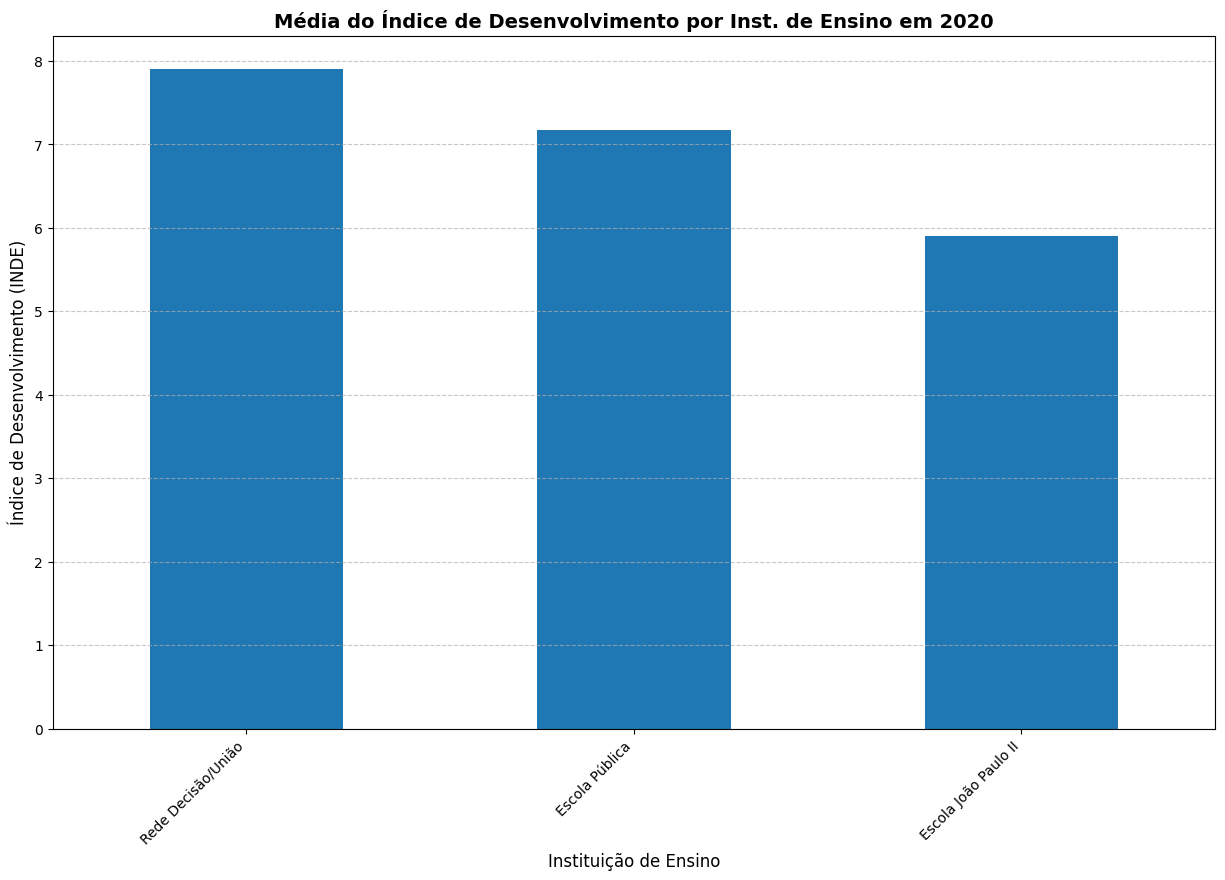

In [550]:
plt.figure(figsize=(15, 9))
df_fund_medio.groupby('INSTITUICAO_ENSINO_ALUNO_2020')['INDE_2020_TRATADO'].mean().sort_values(ascending=False).plot(kind='bar')
# Adicionando rótulos e título
plt.xlabel('Instituição de Ensino', fontsize=12)
plt.ylabel('Índice de Desenvolvimento (INDE)', fontsize=12)
plt.title('Média do Índice de Desenvolvimento por Inst. de Ensino em 2020', fontsize=14, fontweight='bold')

# Rotação dos rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adicionando grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

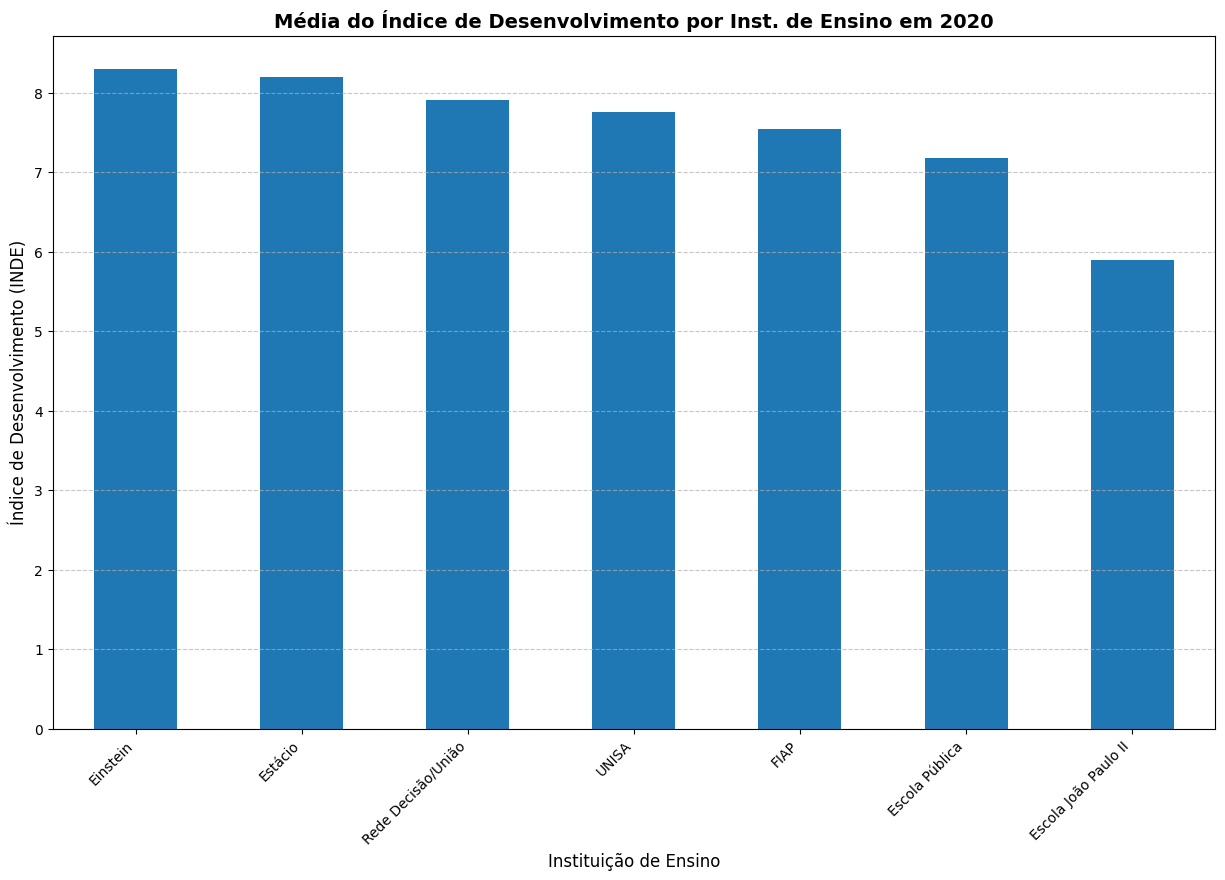

In [551]:
plt.figure(figsize=(15, 9))
df_2020.groupby('INSTITUICAO_ENSINO_ALUNO_2020')['INDE_2020_TRATADO'].mean().sort_values(ascending=False).plot(kind='bar')
# Adicionando rótulos e título
plt.xlabel('Instituição de Ensino', fontsize=12)
plt.ylabel('Índice de Desenvolvimento (INDE)', fontsize=12)
plt.title('Média do Índice de Desenvolvimento por Inst. de Ensino em 2020', fontsize=14, fontweight='bold')

# Rotação dos rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adicionando grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos nos valores
#for index, value in enumerate(df_2020['INDE_2020_TRATADO']):
 #   plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')


# Ajustando o layout para evitar que os rótulos se sobreponham
#plt.tight_layout()

# Exibindo o gráfico
plt.show()

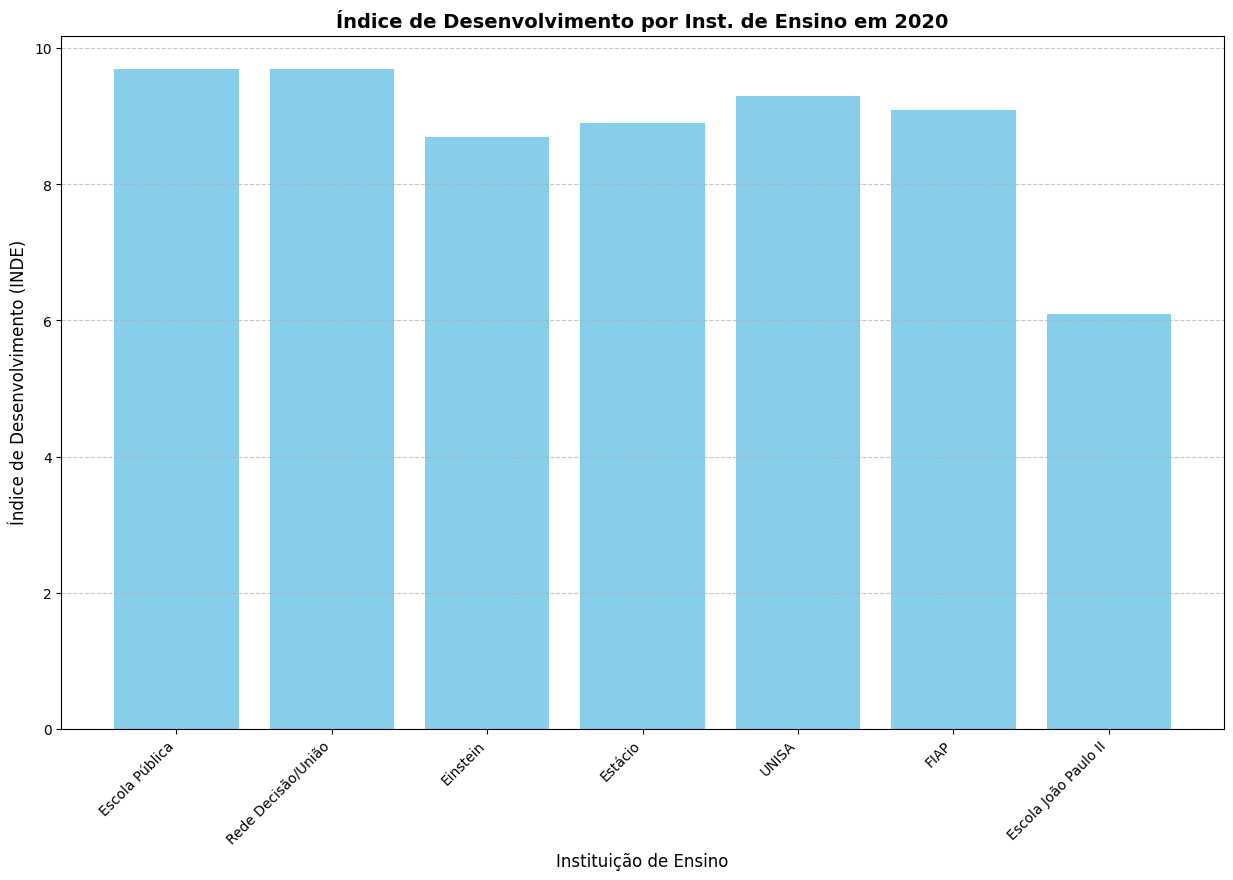

In [552]:
plt.figure(figsize=(15, 9))
plt.bar(df_2020['INSTITUICAO_ENSINO_ALUNO_2020'], df_2020['INDE_2020_TRATADO'], color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Instituição de Ensino', fontsize=12)
plt.ylabel('Índice de Desenvolvimento (INDE)', fontsize=12)
plt.title('Índice de Desenvolvimento por Inst. de Ensino em 2020', fontsize=14, fontweight='bold')

# Rotação dos rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adicionando grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos nos valores
#for index, value in enumerate(df_2020['INDE_2020_TRATADO']):
 #   plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')


# Ajustando o layout para evitar que os rótulos se sobreponham
#plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [553]:
#média do INDE_2020_TRATADO
df_2020['INDE_2020_TRATADO'].mean()

7.294773039889958

In [554]:
df_2020['INDE_2020_TRATADO'] = df_2020['INDE_2020_TRATADO'].astype(float)

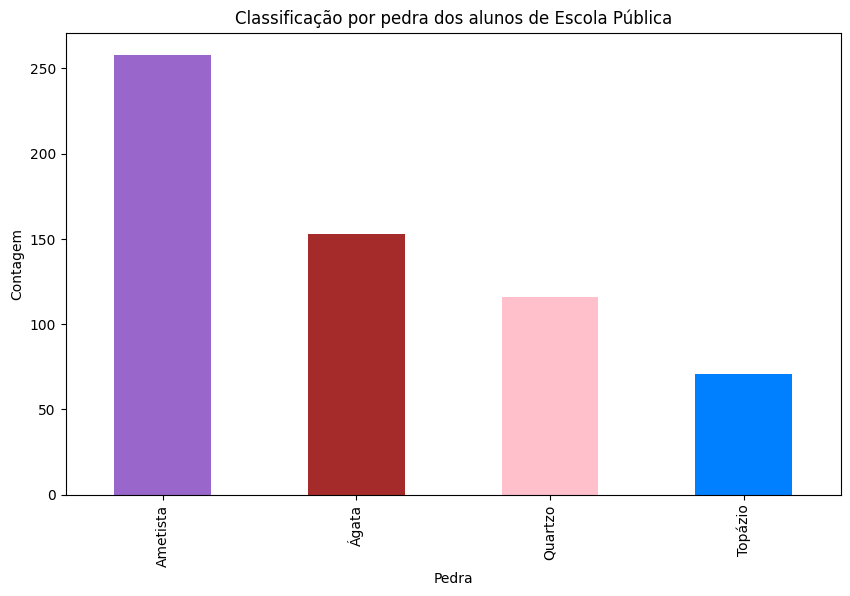

In [555]:
inst_pedra_counts = df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'Escola Pública'")['PEDRA_2020'].value_counts()

colors = ['#9966CC','#A52A2A', '#FFC0CB',   '#007FFF']
#df_y = df_y.value_counts()
plt.figure(figsize= (10,6))
inst_pedra_counts.plot(kind='bar', color=colors)
plt.title('Classificação por pedra dos alunos de Escola Pública')
plt.xlabel('Pedra')
plt.ylabel('Contagem')
plt.show()

 pode-se ver o resultado final do desempenho dos alunos de escola publica, agora vamos destrinchar esse desempenho e entender melhor vantagens e desvantagens.

In [556]:
df_2020['FASE_TURMA_2020'].unique()

array(['2H', '3H', '1D', '2M', '4L', '3B', '0A', '3G', '2D', '1G', '3E',
       '3J', '0C', '2C', '7B', '3C', '2N', '3F', '4F', '1M', '0D', '2F',
       '5X', '6C', '6B', '5F', '1N', '2L', '1F', '3L', '0B', '1A', '4B',
       '6A', '0G', '3M', '3A', '7A', '1J', '0F', '0H', '4A', '1C', '5A',
       '5L', '1R', '2J', '1H', '8A', '1B', '0E', '5G', '2G', '2R', '5B',
       '2P', '1E', '2B', '2E', '3R', '1K', '4E'], dtype=object)

In [557]:
# separar FASE de TURMA em FASE_TURMA_2020
import re

def extrair_fase_turma_simplificado(texto):
 # Extrai a fase e a turma de um texto como '2H'
  match = re.match(r'(\d+)([A-Z])', texto)
  if match:
    fase = int(match.group(1))
    turma = match.group(2)
    return fase, turma
  else:
      return None, None


# Aplica a função a cada linha da coluna 'FASE_TURMA_2020'
df_2020[['FASE_2020', 'TURMA_2020']] = df_2020['FASE_TURMA_2020'].apply(lambda x: pd.Series(extrair_fase_turma_simplificado(x)))

# Imprime o DataFrame com as novas colunas
df_2020[['FASE_2020', 'TURMA_2020']]

,FASE_2020,TURMA_2020
0,2,H
2,3,H
3,1,D
4,2,M
7,4,L
...,...,...
1340,7,B
1342,2,M
1343,1,R
1346,7,B


In [558]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.9,8.50,7.50,7.00,5.94,7.75,2,H
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,7.9,7.92,7.50,5.50,8.12,8.11,3,H
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,5.1,8.00,6.88,0.00,7.19,7.75,1,D
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,8.1,7.50,7.50,7.50,8.44,8.17,2,M
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,8.4,8.33,4.38,7.33,8.75,8.94,4,L


In [559]:
# QUANTIDADE DE ALUNOS POR FASE
df_2020['FASE_2020'].value_counts()

,count
FASE_2020,
1,172
2,155
3,122
0,82
4,55
5,54
7,33
6,30
8,24


In [560]:
df_2020['IDADE_ALUNO_2020'] = df_2020['IDADE_ALUNO_2020'].astype(int)

In [561]:
# média de idade por fase
df_2020.groupby('FASE_2020')['IDADE_ALUNO_2020'].mean()

,IDADE_ALUNO_2020
FASE_2020,
0,8.743902
1,10.186047
2,11.612903
3,13.303279
4,14.509091
5,15.611111
6,16.200000
7,17.090909
8,18.250000


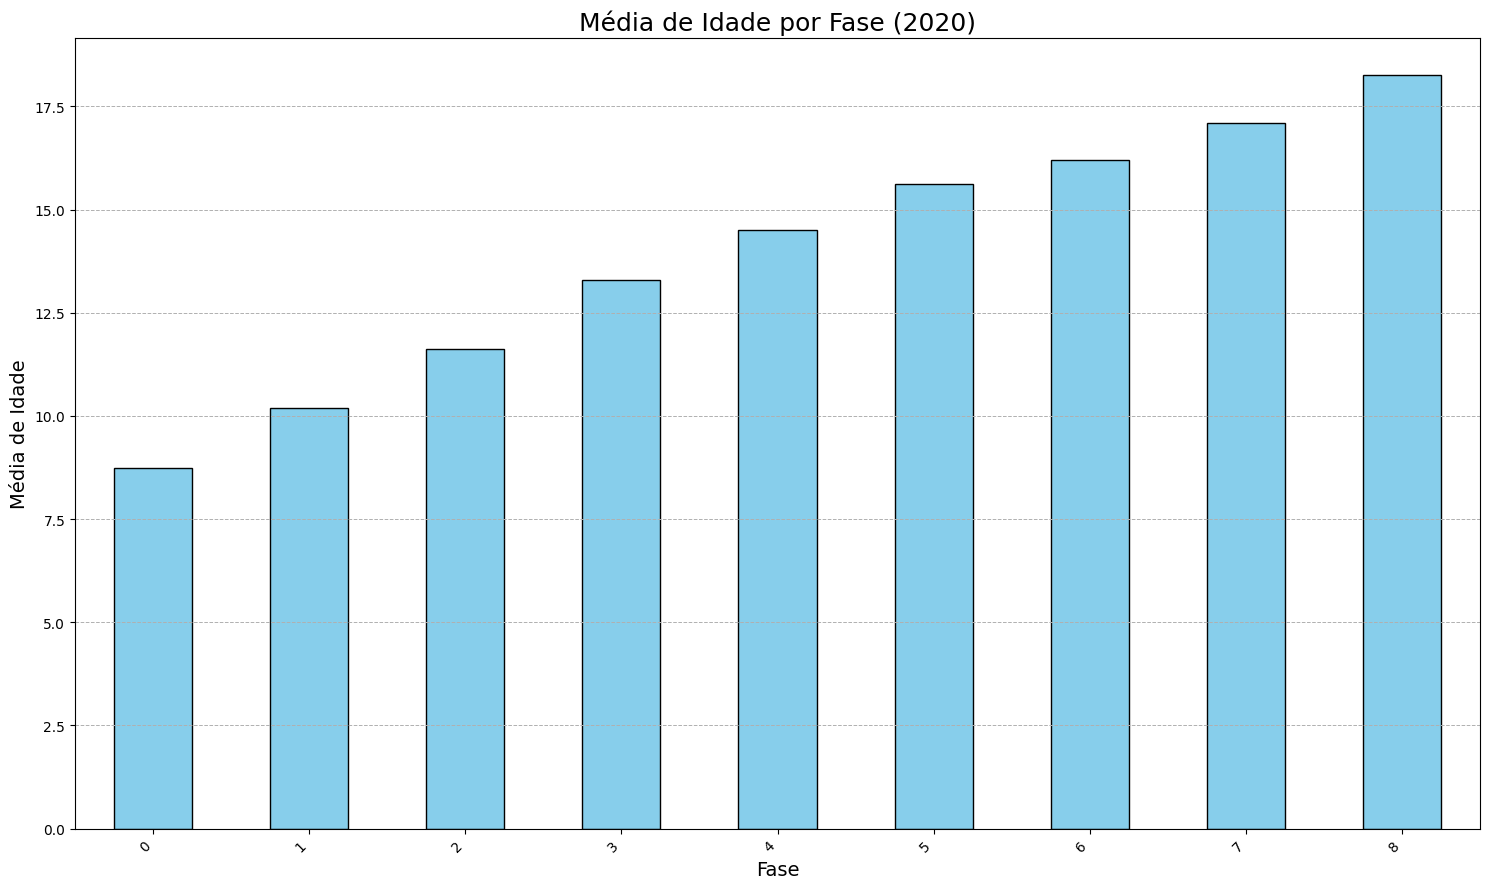

In [562]:
# gráfico de média de idade por fase

# Gráfico de média de idade por fase
plt.figure(figsize=(15, 9))
media_idade_por_fase = df_2020.groupby('FASE_2020')['IDADE_ALUNO_2020'].mean().sort_values(ascending=True)
media_idade_por_fase.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizando o gráfico
plt.title('Média de Idade por Fase (2020)', fontsize=18)
plt.xlabel('Fase', fontsize=14)
plt.ylabel('Média de Idade', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Exibindo o gráfico

In [563]:
df_2020['FASE_TURMA_2020'].apply(lambda x: x.split()[0])

,FASE_TURMA_2020
0,2H
2,3H
3,1D
4,2M
7,4L
...,...
1340,7B
1342,2M
1343,1R
1346,7B


In [564]:
# SEPARAR FASE POR TURMA
df_2020['TURMA_2020'] = df_2020['FASE_TURMA_2020'].apply(lambda x: x.split()[0])
df_2020['TURMA_2020']

,TURMA_2020
0,2H
2,3H
3,1D
4,2M
7,4L
...,...
1340,7B
1342,2M
1343,1R
1346,7B


In [565]:
df_2020.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
       'INDE_2020_TRATADO', 'IAA_2020_TRATADO', 'IPS_2020_TRATADO',
       'IDA_2020_TRATADO', 'IPP_2020_TRATADO', 'IPV_2020_TRATADO', 'FASE_2020',
       'TURMA_2020'],
      dtype='object')

In [566]:
#df_2020_corr = df_2020['IAN_2020_TRATADO'].corr(df_2020['PEDRA_2020
df_2020_corr = df_2020.copy()

df_2020_corr = df_2020_corr[['IAN_2020','IEG_2020','INDE_2020_TRATADO','IAA_2020_TRATADO','IPS_2020_TRATADO','IDA_2020_TRATADO','IPP_2020_TRATADO','IPV_2020_TRATADO']]



In [567]:
print(df_2020_corr.columns)

Index(['IAN_2020', 'IEG_2020', 'INDE_2020_TRATADO', 'IAA_2020_TRATADO',
       'IPS_2020_TRATADO', 'IDA_2020_TRATADO', 'IPP_2020_TRATADO',
       'IPV_2020_TRATADO'],
      dtype='object')


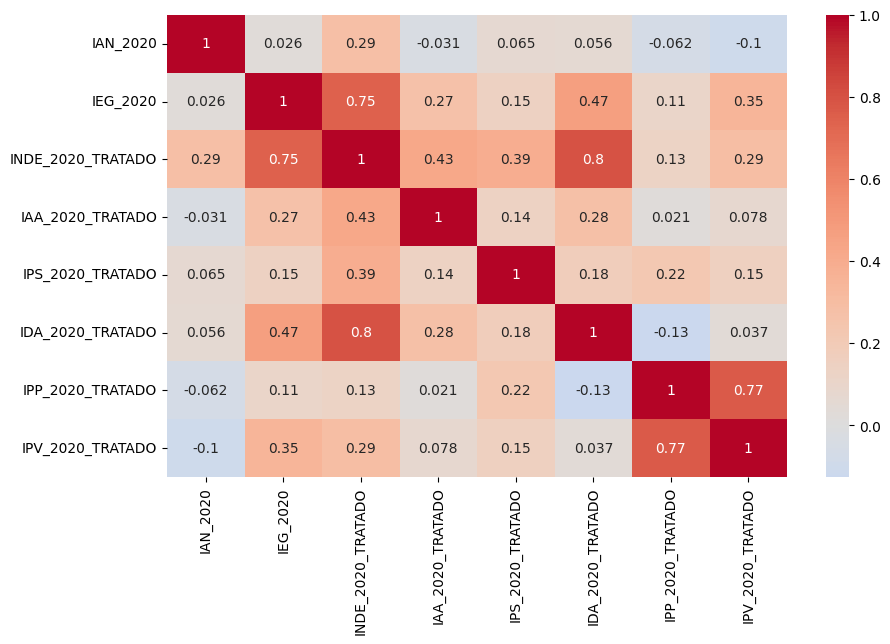

In [568]:
#correlação
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_2020_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

#analyse_corr(df)

# verificando a correlação entre as variaveis:


#### todas elas estao correlacionadas com INDE - Metrica de Processo Avaliativo Geral do Aluno;
#### Dado pela Ponderaçao dos indicadores: IAN, IDA, IEG, IAA, IPS, IPP e IPV


*    IEG  que é o indice de engajamento tem forte correlação, entao quanto mais engajados os alunos sao, maior suas medias de notas no passos magicos. TEM FORTE PESO NAS NOTAS. tambem tem correlação consideravel com IDA - Indice de aprendizagem.

*    IDA tem forte correlação com INDE, pois quanto mais os alunos se dao bem em suas entregas, maiores suas notas e logo seu desempenho.

*   IPP é o que menos importa na nota do INDE, entao deve ter outras variaveis que se destacam nisso.

*   Sao praticamente opostos IPP com IDA, isso pq quanto menor o indice de aprendizado dos alunos menor sua avaliação dos pedagogos e prof.

*   Forte correlação com IPV que é o indicador de virada









In [569]:
# QUANTOS DESSES ALUNOS SE DERAM BEM? POR INSTITUICAO DE ENSINO (ñ escola publica)

df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 != 'Escola Pública'")['PEDRA_2020'].value_counts()

,count
PEDRA_2020,
Ametista,78
Topázio,21
Ágata,18
Quartzo,12


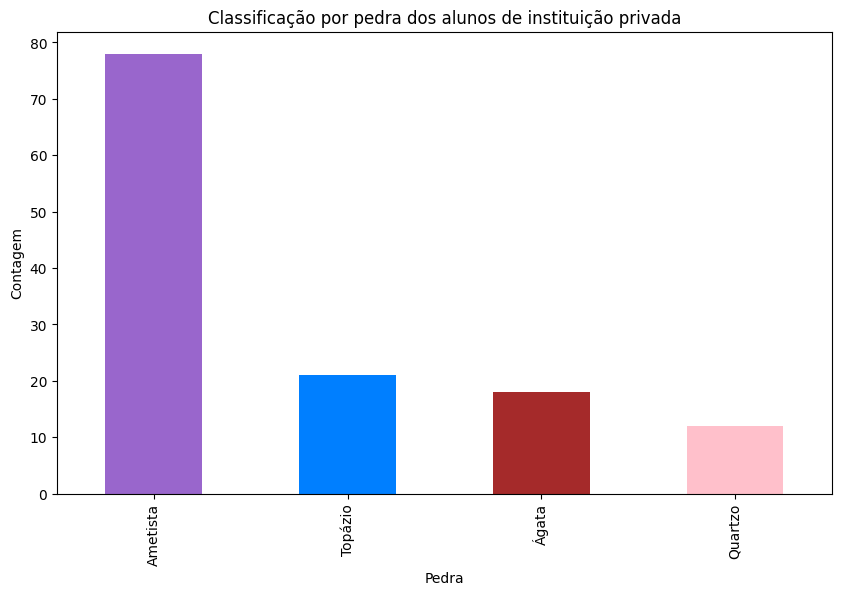

In [570]:
import matplotlib.pyplot as plt

inst_priv_pedra_counts = df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 != 'Escola Pública'")['PEDRA_2020'].value_counts()

colors = ['#9966CC','#007FFF', '#A52A2A', '#FFC0CB'   ]
#df_y = df_y.value_counts()
plt.figure(figsize= (10,6))
inst_priv_pedra_counts.plot(kind='bar', color=colors)
plt.title('Classificação por pedra dos alunos de instituição privada')
plt.xlabel('Pedra')
plt.ylabel('Contagem')
plt.show()

In [571]:
# pode se notar a disparidade dos alunos de rede privada, a maioria tem bons resultados

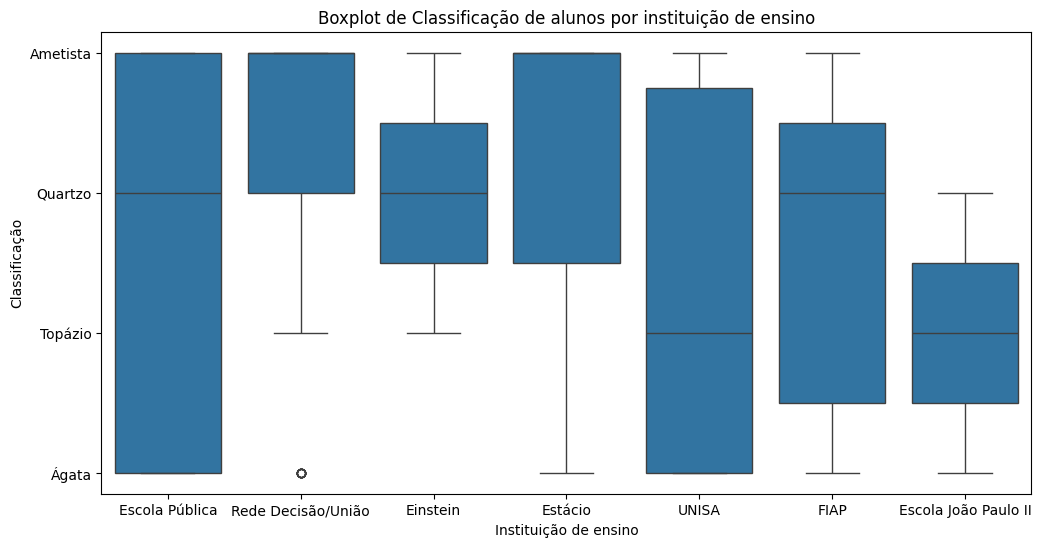

In [572]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(44)

plt.figure(figsize=(12, 6))
sns.boxplot(x='INSTITUICAO_ENSINO_ALUNO_2020', y='PEDRA_2020', data=df_2020)
plt.title('Boxplot de Classificação de alunos por instituição de ensino')
plt.xlabel('Instituição de ensino')
plt.ylabel('Classificação')
plt.show()

In [573]:
# contar alunos pedra por instituicao
df_2020[['INSTITUICAO_ENSINO_ALUNO_2020','PEDRA_2020']].value_counts()

INSTITUICAO_ENSINO_ALUNO_2020  PEDRA_2020
Escola Pública                 Ametista      258
                               Ágata         153
                               Quartzo       116
                               Topázio        71
Rede Decisão/União             Ametista       69
                               Topázio        16
                               Ágata           9
                               Quartzo         7
UNISA                          Ágata           4
FIAP                           Ágata           3
UNISA                          Ametista        3
FIAP                           Quartzo         3
                               Ametista        3
                               Topázio         2
Estácio                        Ametista        2
UNISA                          Topázio         2
Einstein                       Topázio         1
Estácio                        Ágata           1
Escola João Paulo II           Ágata           1
                               Quartzo         1
UNISA                          Quartzo         1
Einstein                       Ametista        1
Name: count, dtype: int64

In [574]:
df_rede_decisao = df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'Rede Decisão/União'  ")
df_rede_decisao['PEDRA_2020'].value_counts()

,count
PEDRA_2020,
Ametista,69
Topázio,16
Ágata,9
Quartzo,7


In [575]:
df_rede_decisao.loc[df_rede_decisao['PEDRA_2020'] == 'Ágata']

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020
54,Rede Decisão/União,ALUNO-55,17,3,6C,Sim,6.878125166666666,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,0,9,7.5,6.333333333333333,8.28125,8.666667499999999,5,6.9,0.00,7.50,6.33,8.28,8.67,6,6C
155,Rede Decisão/União,ALUNO-156,12,2,2J,Não,7.1105566666666675,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,7.9166799999999995,8.9,7.5,5,6.666666666666667,8.11111,5,7.1,7.92,7.50,5.00,6.67,8.11,2,2J
193,Rede Decisão/União,ALUNO-194,17,3,6A,Não,7.1214596666666665,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.33334,8.3,6.875,6.333333333333333,7.65625,7.04167,5,7.1,8.33,6.88,6.33,7.66,7.04,6,6A
871,Rede Decisão/União,ALUNO-872,12,3,2N,Não,6.996391333333334,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,9.000020000000001,8.1,4.375,6,7.5,7.944446666666667,5,7.0,9.00,4.38,6.00,7.50,7.94,2,2N
998,Rede Decisão/União,ALUNO-999,12,2,3G,Não,7.004444666666667,C,Ágata,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,5.8,3.125,7.333333333333333,6.875,7.72222,10,7.0,8.33,3.12,7.33,6.88,7.72,3,3G
1131,Rede Decisão/União,ALUNO-1132,17,1,6C,Não,7.131251333333334,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,7.5,8,6.25,6.166666666666667,7.8125,8.20834,5,7.1,7.50,6.25,6.17,7.81,8.21,6,6C
1190,Rede Decisão/União,ALUNO-1191,12,3,3B,Não,6.828125666666667,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,9.5,4.375,3.3333333333333335,7.65625,6.333335,10,6.8,7.92,4.38,3.33,7.66,6.33,3,3B
1281,Rede Decisão/União,ALUNO-1282,7,0,0A,Não,6.301668,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.9166799999999995,8.8,2.5,8.5,2.5,2.75,10,6.3,7.92,2.50,8.50,2.50,2.75,0,0A
1287,Rede Decisão/União,ALUNO-1288,16,4,6B,Não,6.728749,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,0,7.8,7.5,6,7.1875,7.499995,10,6.7,0.00,7.50,6.00,7.19,7.50,6,6B


<Axes: xlabel='PEDRA_2020'>

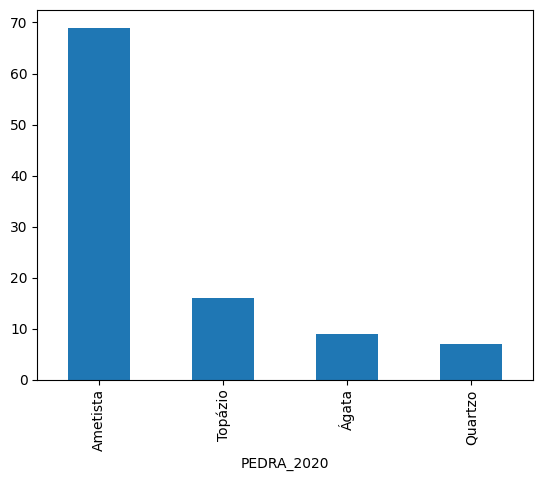

In [576]:
df_rede_decisao['PEDRA_2020'].value_counts().plot(kind='bar')

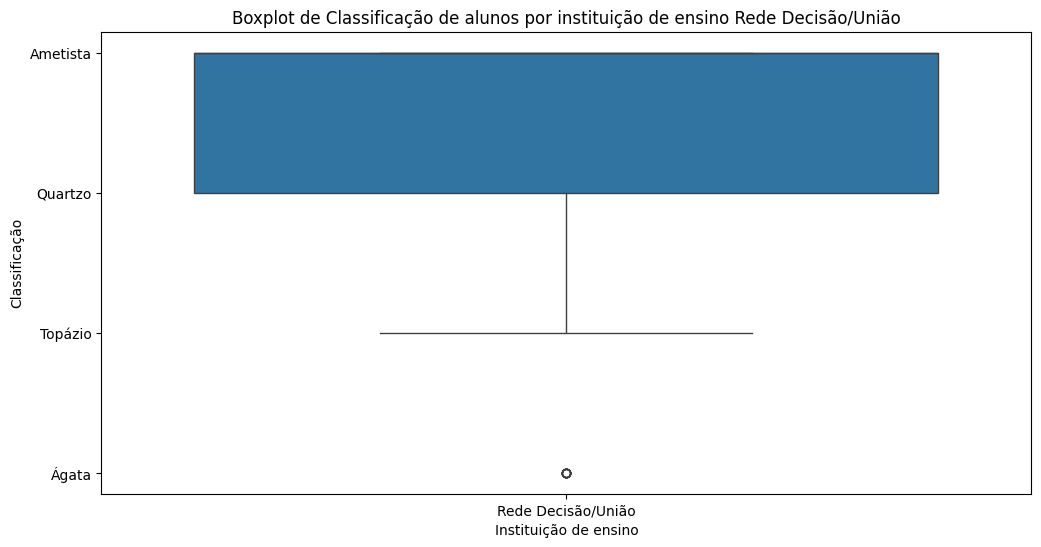

In [577]:
df_rede_decisao = df_2020.query("INSTITUICAO_ENSINO_ALUNO_2020 == 'Rede Decisão/União'  ")

np.random.seed(44)

plt.figure(figsize=(12, 6))
sns.boxplot(x='INSTITUICAO_ENSINO_ALUNO_2020', y='PEDRA_2020', data=df_rede_decisao)
plt.title('Boxplot de Classificação de alunos por instituição de ensino Rede Decisão/União')
plt.xlabel('Instituição de ensino')
plt.ylabel('Classificação')
plt.show()

In [578]:
df_2020['INDE_2020_TRATADO'].max()

9.7

In [579]:
df_2020['INDE_2020_TRATADO'].min()

3.1

In [580]:
melhores_alunos_2020 = df_2020.query("INDE_2020_TRATADO > 6.86")
melhores_alunos_2020.shape # 502 alunos

(507, 27)

In [581]:
melhores_alunos_2020

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.9,8.50,7.50,7.00,5.94,7.75,2,2H
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,7.9,7.92,7.50,5.50,8.12,8.11,3,3H
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,8.1,7.50,7.50,7.50,8.44,8.17,2,2M
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,8.4,8.33,4.38,7.33,8.75,8.94,4,4L
10,Escola Pública,ALUNO-11,8,0,0A,Sim,9.712504000000001,A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,9.000020000000001,10,8.125,10,10,10.00001,10,9.7,9.00,8.12,10.00,10.00,10.00,0,0A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,Escola Pública,ALUNO-1338,10,1,1D,Sim,8.332502999999999,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Ponto a melhorar em 2021: Integrar-se mais aos...,9.500020000000001,8.1,7.5,9.5,8.125,9.000005,5,8.3,9.50,7.50,9.50,8.12,9.00,1,1D
1338,Escola Pública,ALUNO-1339,14,1,3E,Não,7.922223333333333,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Ponto a melhorar em 2021: Integrar-se mais aos...,10.000020000000001,10,7.5,7.666666666666667,7.5,6.944439999999999,5,7.9,10.00,7.50,7.67,7.50,6.94,3,3E
1340,Rede Decisão/União,ALUNO-1341,17,1,7B,Sim,8.430002833333335,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.75001,8.9,6.875,7.166666666666667,8.125,9.2083425,10,8.4,8.75,6.88,7.17,8.12,9.21,7,7B
1346,Escola Pública,ALUNO-1347,17,1,7B,Não,7.158543333333334,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,9.16668,8.1,6.875,4.666666666666667,7.34375,6.333335,10,7.2,9.17,6.88,4.67,7.34,6.33,7,7B


In [582]:
melhores_alunos_2020[['PEDRA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020']].value_counts()

PEDRA_2020  INSTITUICAO_ENSINO_ALUNO_2020
Ametista    Escola Pública                   258
Topázio     Escola Pública                    71
Ametista    Rede Decisão/União                69
Ágata       Escola Pública                    68
Topázio     Rede Decisão/União                16
Ágata       Rede Decisão/União                 6
Ametista    FIAP                               3
            UNISA                              3
Ágata       FIAP                               3
Ametista    Estácio                            2
Topázio     FIAP                               2
            UNISA                              2
Ametista    Einstein                           1
Topázio     Einstein                           1
Ágata       Estácio                            1
            UNISA                              1
Name: count, dtype: int64

In [583]:
# MELHORES ALUNOS POR FASE E INSTITUICAO
melhores_alunos_2020[['PEDRA_2020', 'FASE_2020', 'INSTITUICAO_ENSINO_ALUNO_2020']].value_counts()

PEDRA_2020  FASE_2020  INSTITUICAO_ENSINO_ALUNO_2020
Ametista    1          Escola Pública                   83
            2          Escola Pública                   60
            0          Escola Pública                   41
            3          Escola Pública                   37
Topázio     0          Escola Pública                   26
            1          Escola Pública                   25
Ametista    3          Rede Decisão/União               18
            4          Escola Pública                   17
Ágata       1          Escola Pública                   16
            2          Escola Pública                   15
            3          Escola Pública                   14
Ametista    2          Rede Decisão/União               13
            5          Rede Decisão/União               13
                       Escola Pública                   10
            7          Rede Decisão/União                9
Topázio     3          Escola Pública                    9
Ametista    4          Rede Decisão/União                9
Ágata       0          Escola Pública                    8
Ametista    7          Escola Pública                    7
Topázio     2          Escola Pública                    7
Ágata       7          Escola Pública                    6
            5          Escola Pública                    5
Topázio     3          Rede Decisão/União                5
Ametista    6          Rede Decisão/União                4
Topázio     4          Rede Decisão/União                4
Ágata       4          Escola Pública                    3
Topázio     7          Rede Decisão/União                3
Ágata       6          Rede Decisão/União                3
Topázio     4          Escola Pública                    3
Ágata       8          FIAP                              3
Topázio     2          Rede Decisão/União                3
Ametista    6          Escola Pública                    3
            8          UNISA                             3
                       FIAP                              3
            1          Rede Decisão/União                2
Ágata       2          Rede Decisão/União                2
Topázio     8          FIAP                              2
                       UNISA                             2
Ametista    8          Estácio                           2
            5          Einstein                          1
Ágata       3          Rede Decisão/União                1
Topázio     5          Rede Decisão/União                1
Ágata       6          Escola Pública                    1
Topázio     5          Escola Pública                    1
                       Einstein                          1
Ágata       8          Estácio                           1
Ametista    0          Rede Decisão/União                1
Ágata       8          UNISA                             1
Name: count, dtype: int64

In [584]:
piores_alunos_2020 = df_2020.query("INDE_2020_TRATADO < 5.05")
piores_alunos_2020.shape # 42 alunos

(42, 27)

In [585]:
piores_alunos_2020 # somente 1 aluno é da rede privada

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020
135,Escola Pública,ALUNO-136,16,2,5A,Não,4.643056,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,7.5,4,4.375,2,6.666666666666667,5.444446666666667,5,4.6,7.50,4.38,2.00,6.67,5.44,5,5A
159,Escola Pública,ALUNO-160,10,2,1H,Não,4.478057333333334,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,2.3,5,0,7.291666666666667,7.444443333333333,5,4.5,8.00,5.00,0.00,7.29,7.44,1,1H
172,Escola Pública,ALUNO-173,16,4,5G,Não,3.7383341666666663,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,7.91667,0.9,3.125,2.8333333333333335,5.625,4.1250025,5,3.7,7.92,3.12,2.83,5.62,4.13,5,5G
191,Escola Pública,ALUNO-192,11,2,1H,Não,4.854723333333333,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,7.4166799999999995,5.1,5,0,6.041666666666666,7.444443333333333,5,4.9,7.42,5.00,0.00,6.04,7.44,1,1H
201,Escola Pública,ALUNO-202,12,2,2R,Não,3.7799986666666667,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,0,2.9,6.875,0,6.458333333333334,6.833326666666666,5,3.8,0.00,6.88,0.00,6.46,6.83,2,2R
229,Rede Decisão/União,ALUNO-230,14,4,3G,Não,5.0047223333333335,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.75001,6.1,4.375,2.3333333333333335,5.833333333333333,4.611106666666667,5,5.0,8.75,4.38,2.33,5.83,4.61,3,3G
272,Escola Pública,ALUNO-273,14,2,1R,Não,4.386945333333334,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,9.000020000000001,4.4,7.5,0,7.291666666666667,4.388883333333333,2.5,4.4,9.00,7.50,0.00,7.29,4.39,1,1R
292,Escola Pública,ALUNO-293,14,1,5F,Não,4.4162505,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,6.66667,1.3,4.375,0,7.1875,6.6666675,10,4.4,6.67,4.38,0.00,7.19,6.67,5,5F
305,Escola Pública,ALUNO-306,17,1,7B,Não,3.8914599999999995,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,6.66667,1.4,4.375,0,5.15625,4.95834,10,3.9,6.67,4.38,0.00,5.16,4.96,7,7B
320,Escola Pública,ALUNO-321,16,1,6A,Não,4.9156245,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,4.58334,2,7.5,2,6.40625,6.3333275,10,4.9,4.58,7.50,2.00,6.41,6.33,6,6A


In [586]:
df_2020.loc[df_2020['FASE_2020'] == 8]

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020
160,Estácio,ALUNO-161,18,4,8A,NaN,8.891667,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,7.91667,10,7.5,9,0,0,10,8.9,7.92,7.50,9.00,0.00,0.00,8,8A
215,UNISA,ALUNO-216,18,1,8A,NaN,5.960001,D,Quartzo,Ponto a melhorar em 2021: Melhorar o seu engaj...,Ponto a melhorar em 2021: As suas notas na Fac...,NaN,8.75001,0,5.625,7.4,0,0,10,6.0,8.75,5.62,7.40,0.00,0.00,8,8A
298,Estácio,ALUNO-299,19,4,8A,NaN,8.388334,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,5.83334,10,5.625,9.2,0,0,10,8.4,5.83,5.62,9.20,0.00,0.00,8,8A
299,UNISA,ALUNO-300,18,1,8A,NaN,6.776668000000001,C,Ágata,Ponto a melhorar em 2021: Melhorar o seu engaj...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,9.16668,0,7.5,8.4,0,0,10,6.8,9.17,7.50,8.40,0.00,0.00,8,8A
340,FIAP,ALUNO-341,19,2,8A,NaN,9.096668,A,Topázio,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,9.16668,10,7.5,9.2,0,0,10,9.1,9.17,7.50,9.20,0.00,0.00,8,8A
367,UNISA,ALUNO-368,18,1,8A,NaN,8.695001000000001,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,8.75001,10,7.5,8.3,0,0,10,8.7,8.75,7.50,8.30,0.00,0.00,8,8A
379,FIAP,ALUNO-380,19,4,8A,NaN,5.3950000000000005,D,Quartzo,Ponto a melhorar em 2021: Melhorar o seu engaj...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,0,0,4.375,8.8,0,0,10,5.4,0.00,4.38,8.80,0.00,0.00,8,8A
381,FIAP,ALUNO-382,18,1,8A,NaN,8.848334000000001,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,8.33334,10,6.875,9.1,0,0,10,8.8,8.33,6.88,9.10,0.00,0.00,8,8A
483,FIAP,ALUNO-484,18,4,8A,NaN,5.703335,D,Quartzo,Ponto a melhorar em 2021: Melhorar o seu engaj...,Ponto a melhorar em 2021: As suas notas na Fac...,NaN,9.58335,0,3.125,7.8,0,0,10,5.7,9.58,3.12,7.80,0.00,0.00,8,8A
494,FIAP,ALUNO-495,19,1,8A,NaN,8.651667,B,Ametista,Seu destaque em 2020: O seu bom engajamento na...,Seu destaque em 2020: As suas boas notas na Fa...,NaN,7.91667,10,7.5,8.4,0,0,10,8.7,7.92,7.50,8.40,0.00,0.00,8,8A


In [587]:
# distribuição de alunos por fase
df_2020['FASE_2020'].value_counts()

,count
FASE_2020,
1,172
2,155
3,122
0,82
4,55
5,54
7,33
6,30
8,24


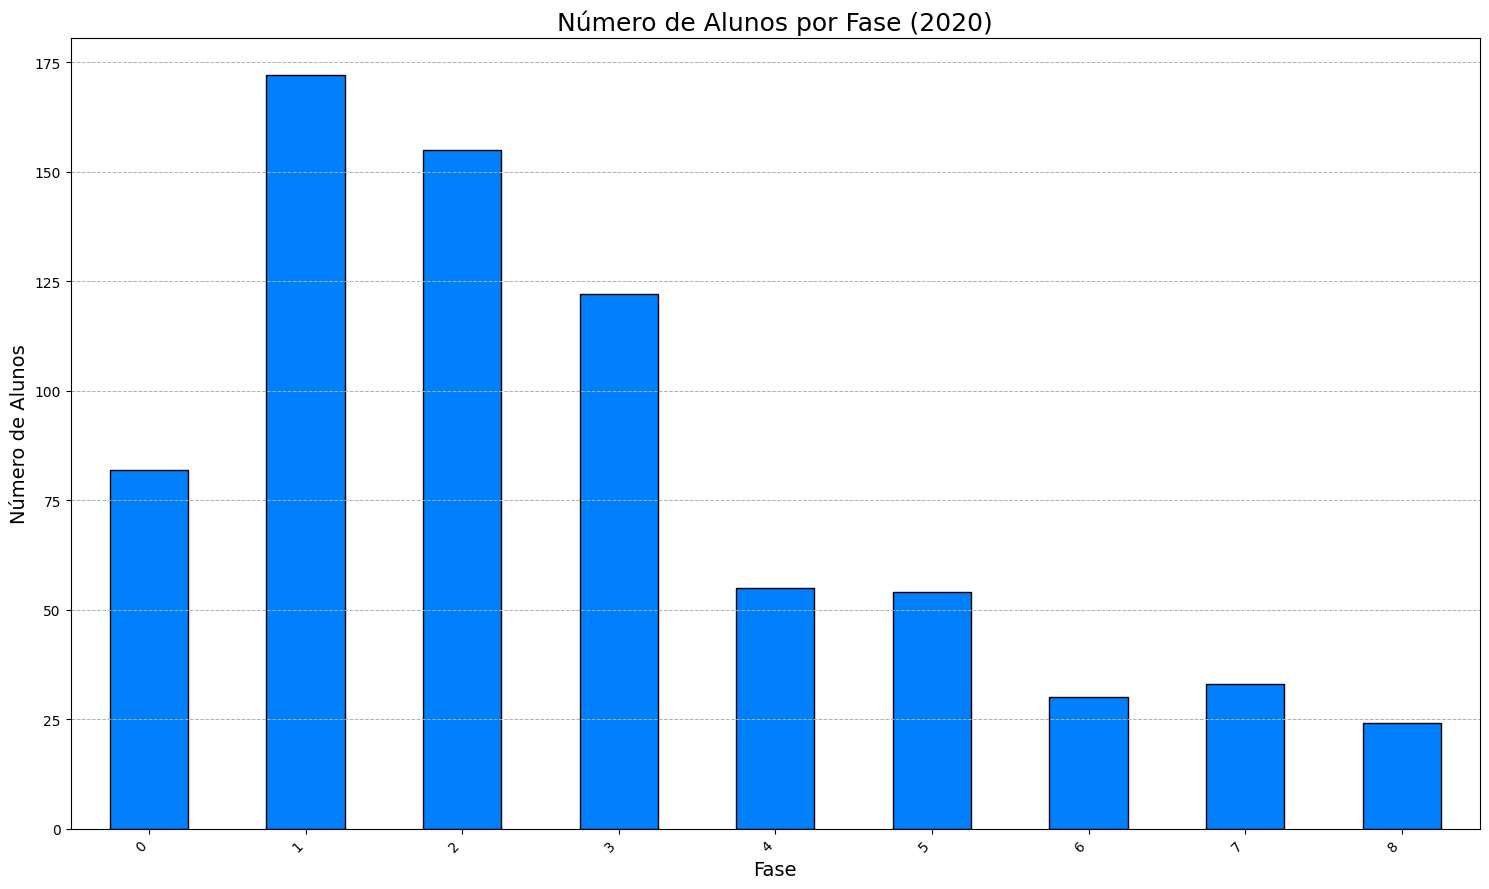

In [588]:
# grafico de alunos por fase
import matplotlib.pyplot as plt

# Gráfico de alunos por fase
plt.figure(figsize=(15, 9))
alunos_por_fase = df_2020['FASE_2020'].value_counts().sort_index()
alunos_por_fase.plot(kind='bar', color='#007FFF', edgecolor='black')

# Personalizando o gráfico
plt.title('Número de Alunos por Fase (2020)', fontsize=18)
plt.xlabel('Fase', fontsize=14)
plt.ylabel('Número de Alunos', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [589]:
#df_2020_float = df_2020.to_csv('df_2020_campos_tratados_float.csv', index=False)

# DF 2021

In [590]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [591]:
df_2021['FASE_2021'].value_counts()

,count
FASE_2021,
2.0,162
1.0,136
0.0,122
3.0,115
4.0,59
5.0,50
6.0,23
7.0,19


In [592]:
df_ingressantes_2021 = df_2021.loc[df_2021['SINALIZADOR_INGRESSANTE_2021'] == 'Ingressante']

In [593]:
# ingressante por fase
df_ingressantes_2021['FASE_2021'].value_counts()

,count
FASE_2021,
0.0,93
1.0,48
3.0,41
2.0,23
5.0,19
4.0,18
6.0,5
7.0,2


In [594]:
df_2021[['INSTITUICAO_ENSINO_ALUNO_2021']].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,557
Rede Decisão,127
Escola JP II,2


In [595]:
df_2021[['SINALIZADOR_INGRESSANTE_2021','INSTITUICAO_ENSINO_ALUNO_2021']].value_counts()

,,count
SINALIZADOR_INGRESSANTE_2021,INSTITUICAO_ENSINO_ALUNO_2021,
Veterano,Escola Pública,320
Ingressante,Escola Pública,237
Veterano,Rede Decisão,115
Ingressante,Rede Decisão,12
Veterano,Escola JP II,2


In [596]:
df_2021.shape

(686, 21)

In [597]:
df_2021['INDE_2021'].value_counts() # 3 numeros, vou alterar para manter o padrao dessa base: 1 numero apos o ponto

,count
INDE_2021,
6.917,4
7.196,4
8.544,3
7.440,3
7.360,3
...,...
7.215,1
5.185,1
9.021,1


In [598]:
df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,557
Rede Decisão,127
Escola JP II,2


In [599]:
# houve uma diferença de alunos da escola publica, para a privada nao houve nenhuma diferença

df_2021

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,ALUNO-1338,2.0,C,Escola Pública,Veterano,Ágata,6.511,7.9,2.1,7.5,5.2,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.7,10.0,Nível 2 (5o e 6o ano),0.0
1342,ALUNO-1343,2.0,K,Escola Pública,Veterano,Quartzo,3.996,10.0,1.3,5.6,1.3,6.9,Mantido na Fase atual,Não avaliado,Mantido na Fase atual,Não avaliado,Não,3.7,5.0,Nível 3 (7o e 8o ano),-1.0
1343,ALUNO-1344,2.0,R,Escola Pública,Veterano,Ágata,5.664,9.5,5.8,5.6,2.0,8.1,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.6,2.5,Nível 5 (1o EM),-3.0
1344,ALUNO-1345,0.0,L,Escola Pública,Ingressante,Ágata,6.606,9.0,6.7,7.5,4.9,7.2,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,7.1,5.0,Nível 1 (4o ano),-1.0


In [600]:
#tratar dado nulo
df_2021.loc[df_2021['INDE_2021'].str.contains('#NULO!')]

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
70,ALUNO-71,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,3.6,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,5.0,Nível 2 (5o e 6o ano),-2.0
505,ALUNO-506,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,4.1,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,10.0,ALFA (2o e 3o ano),0.0


In [601]:
df_2021.loc[df_2021['INDE_2021'].str.contains('#NULO!')].index

Index([70, 505], dtype='int64')

In [602]:
drop_index = df_2021.loc[df_2021['INDE_2021'].str.contains('#NULO!')].index
df_2021.drop(drop_index, inplace=True)

In [603]:

df_2021['INDE_2021_TRATADO'] = df_2021['INDE_2021'].astype(float)
df_2021['INDE_2021_TRATADO'] = df_2021['INDE_2021_TRATADO'].map('{:.1f}'.format)


In [604]:
df_2021['INDE_2021_TRATADO'].value_counts()

,count
INDE_2021_TRATADO,
8.0,31
7.4,30
7.2,29
6.9,27
7.3,27
...,...
2.8,1
2.5,1
3.3,1


In [605]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 1347
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           684 non-null    object 
 1   FASE_2021                      684 non-null    float64
 2   TURMA_2021                     684 non-null    object 
 3   INSTITUICAO_ENSINO_ALUNO_2021  684 non-null    object 
 4   SINALIZADOR_INGRESSANTE_2021   684 non-null    object 
 5   PEDRA_2021                     684 non-null    object 
 6   INDE_2021                      684 non-null    object 
 7   IAA_2021                       684 non-null    float64
 8   IEG_2021                       684 non-null    float64
 9   IPS_2021                       684 non-null    float64
 10  IDA_2021                       684 non-null    float64
 11  IPP_2021                       684 non-null    float64
 12  REC_EQUIPE_1_2021              684 non-null    object 

In [606]:
df_2021['INDE_2021_TRATADO'] = df_2021['INDE_2021_TRATADO'].astype(float)

In [607]:
 #INDE POR FASE_2021
df_2021.groupby('FASE_2021')['INDE_2021_TRATADO'].mean()

,INDE_2021_TRATADO
FASE_2021,
0.0,7.293333
1.0,6.920588
2.0,6.608025
3.0,6.694783
4.0,6.837288
5.0,6.888000
6.0,7.013043
7.0,7.657895


In [608]:
def plot_tratamento_por_fase(df, ano, col_fase, col_tratado, titulo):
    """
    Plota um gráfico de barras mostrando a média da coluna 'col_tratado' por 'col_fase'.

    Args:
        df: DataFrame com os dados.
        ano: Ano dos dados.
        col_fase: Nome da coluna que representa as fases (ex: 'FASE_2021').
        col_tratado: Nome da coluna que representa se o tratamento foi realizado (ex: 'INDE_2021_TRATADO').
        titulo: Título do gráfico.
    """
    plt.figure(figsize=(15, 9))

    # Agrupa e calcula a média
    media_por_fase = df.groupby(col_fase)[col_tratado].mean().sort_values(ascending=False)

    # Paleta de cores
    cores = sns.color_palette("viridis", len(media_por_fase))

    # Cria o gráfico de barras
    bars = plt.bar(media_por_fase.index, media_por_fase.values, color=cores)

    # Adiciona rótulos nos eixos e título
    plt.xlabel('Fases', fontsize=14)
    plt.ylabel('Média do INDE', fontsize=14)
    plt.title(titulo, fontsize=16, fontweight='bold')

    # Formata os rótulos do eixo x para melhor leitura (rotação e alinhamento)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Adiciona as porcentagens nas barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}',
                 ha='center', va='bottom', fontsize=10)

    # Adiciona uma grade horizontal para facilitar a visualização
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajusta o layout para não cortar os rótulos
    plt.tight_layout()

    plt.show()

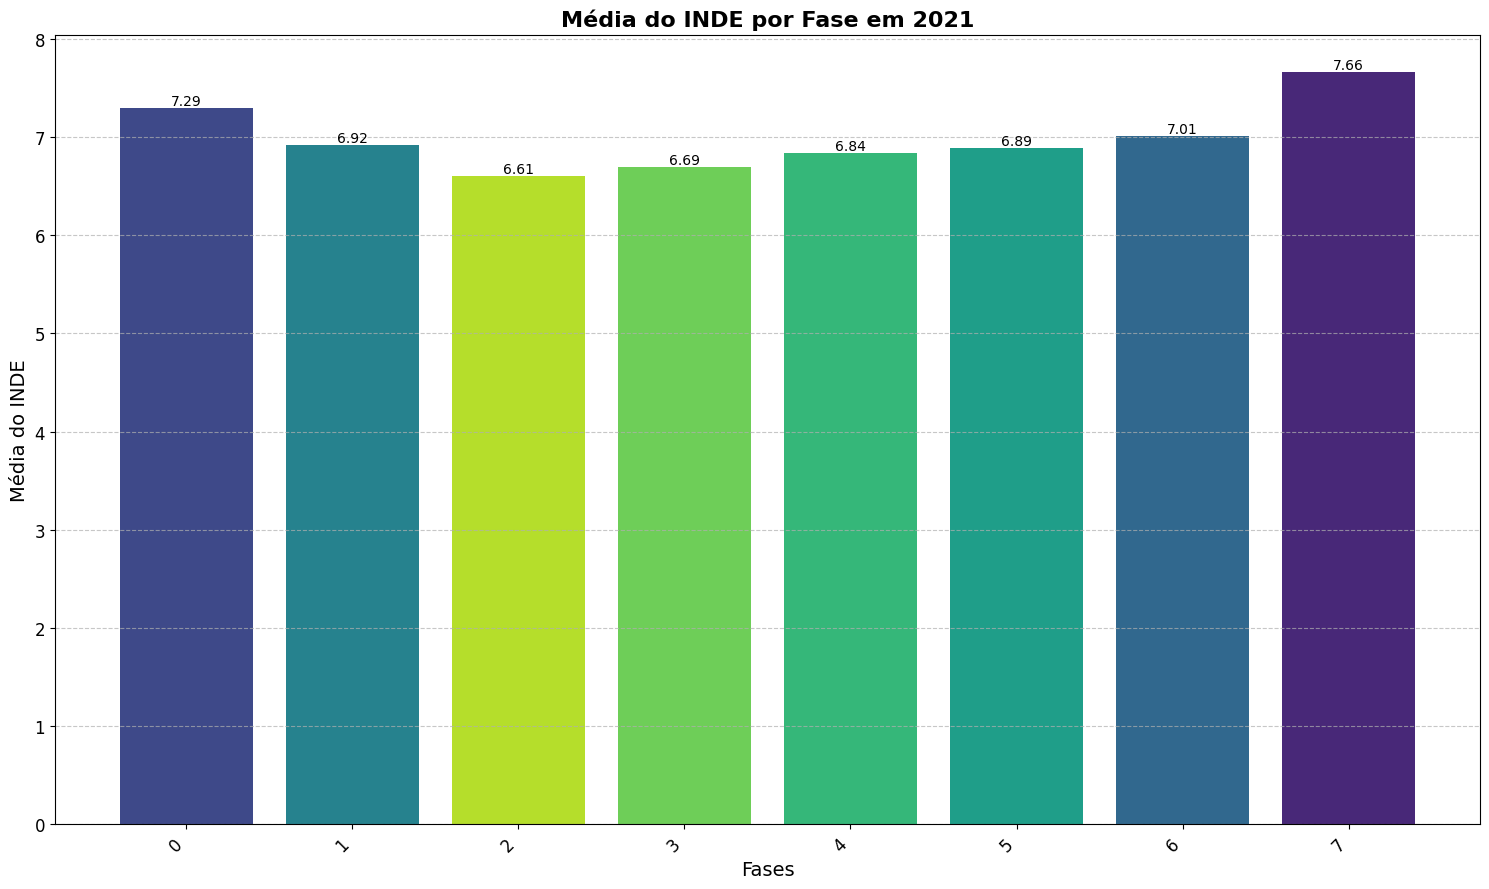

In [609]:
plot_tratamento_por_fase(df=df_2021,
                          ano=2021,
                          col_fase='FASE_2021',
                          col_tratado='INDE_2021_TRATADO',
                          titulo='Média do INDE por Fase em 2021')

In [610]:
#contar alunos por fase
df_2021['FASE_2021'].value_counts()

,count
FASE_2021,
2.0,162
1.0,136
0.0,120
3.0,115
4.0,59
5.0,50
6.0,23
7.0,19


In [611]:
# ingressante 2021 por fase
df_ingressantes_2021['FASE_2021'].value_counts()

,count
FASE_2021,
0.0,93
1.0,48
3.0,41
2.0,23
5.0,19
4.0,18
6.0,5
7.0,2


In [612]:
# somente alunos da fase 2.0 e 3.0
df_2021_2_3 = df_2021.query("FASE_2021 == 2.0 or FASE_2021 == 3.0")
df_2021_2_3

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,7.3
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,7.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,7.4
18,ALUNO-19,2.0,C,Escola Pública,Ingressante,Ágata,6.751,9.0,6.3,7.5,4.6,7.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,8.3,5.0,Nível 3 (7o e 8o ano),-1.0,6.8
28,ALUNO-29,3.0,D,Escola Pública,Ingressante,Ágata,6.342,9.6,5.3,7.5,3.8,7.5,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.9,5.0,Nível 5 (1o EM),-2.0,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,ALUNO-1335,2.0,G,Rede Decisão,Ingressante,Quartzo,4.831,0.0,3.8,7.5,3.4,6.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,4.9,10.0,Nível 2 (5o e 6o ano),0.0,4.8
1337,ALUNO-1338,2.0,C,Escola Pública,Veterano,Ágata,6.511,7.9,2.1,7.5,5.2,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.7,10.0,Nível 2 (5o e 6o ano),0.0,6.5
1342,ALUNO-1343,2.0,K,Escola Pública,Veterano,Quartzo,3.996,10.0,1.3,5.6,1.3,6.9,Mantido na Fase atual,Não avaliado,Mantido na Fase atual,Não avaliado,Não,3.7,5.0,Nível 3 (7o e 8o ano),-1.0,4.0
1343,ALUNO-1344,2.0,R,Escola Pública,Veterano,Ágata,5.664,9.5,5.8,5.6,2.0,8.1,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.6,2.5,Nível 5 (1o EM),-3.0,5.7


In [613]:
# média do IAA para df_2021_2_3
df_2021_2_3['IAA_2021'].mean()



7.675090252707581

In [614]:
# média IAN
df_2021_2_3['IAN_2021'].mean()

7.030685920577618

In [615]:
# média IEG
df_2021_2_3['IEG_2021'].mean()

6.10216606498195

In [616]:
# média IDA
df_2021_2_3['IDA_2021'].mean()

5.258122743682311

In [617]:
# média IPS
df_2021_2_3['IPS_2021'].mean()

6.956678700361011

In [618]:
# média IPP
df_2021_2_3['IPP_2021'].mean()

7.603249097472926

In [619]:
# média IPV
df_2021_2_3['IPV_2021'].mean()

7.246931407942238

In [620]:
# média INDE
df_2021_2_3['INDE_2021_TRATADO'].mean()

6.644043321299638

In [621]:
num_indicators = ['INDE_2021_TRATADO', 'IPV_2021', 'IPP_2021', 'IPS_2021', 'IDA_2021', 'IEG_2021', 'IAN_2021', 'IAA_2021']


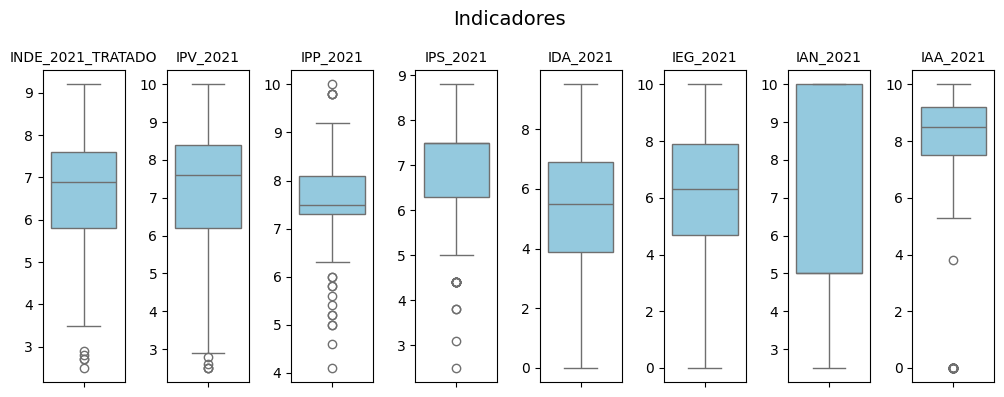

In [622]:
# Indicadores do ano de 2021 - para as fases 2 e 3
fig, axs = plt.subplots(1, num_indicators.__len__(), figsize=(10, 4))

fig.suptitle('Indicadores', fontsize=14)
for i, indicator in enumerate(num_indicators):
    sns.boxplot(data=df_2021_2_3, y=indicator, ax=axs[i], color='skyblue')
    axs[i].set_title(indicator, fontsize=10)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
plt.tight_layout()
plt.show()

In [623]:
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,7.3
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,7.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,7.4
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,8.3
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,9.0


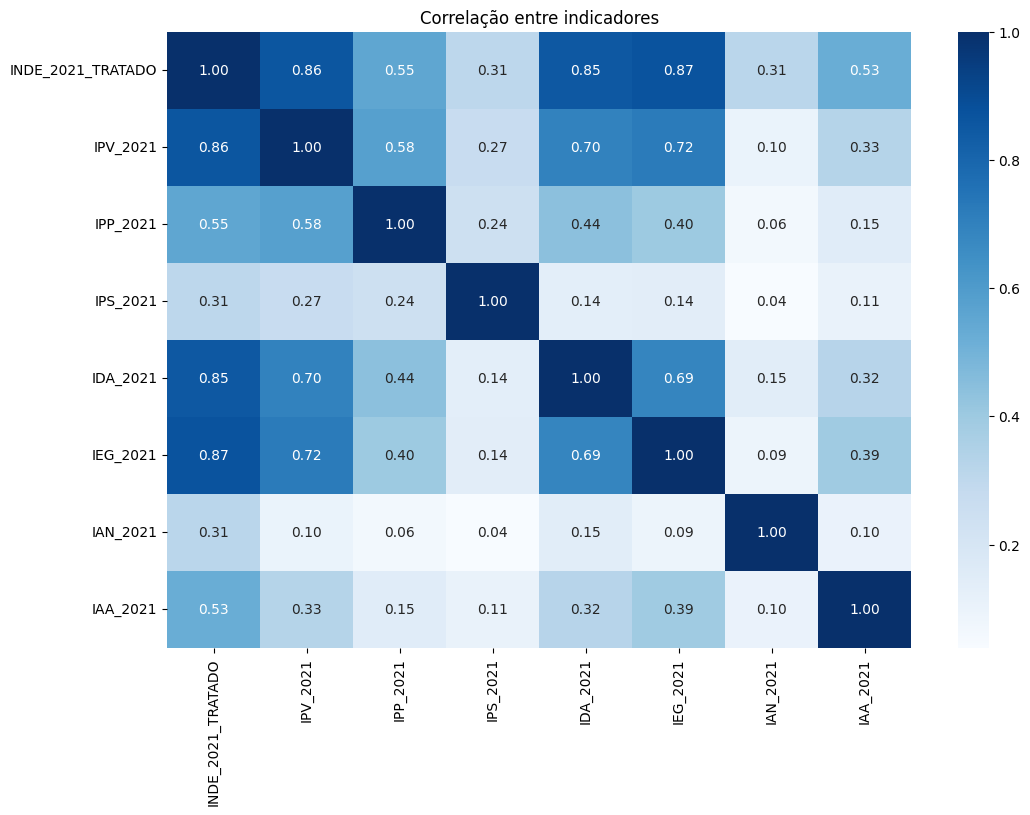

In [624]:
# correlação entre indicadores técnicos
corr = df_2021[num_indicators].corr()

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlação entre indicadores')
plt.show()

In [625]:
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,7.3
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,7.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,7.4
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,8.3
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,9.0


In [626]:
# SINALIZADOR_INGRESSANTE_2021 value_counts em df_2021
df_2021['SINALIZADOR_INGRESSANTE_2021'].value_counts()

,count
SINALIZADOR_INGRESSANTE_2021,
Veterano,435
Ingressante,249


In [627]:
# INDE por SINALIZADOR_INGRESSANTE_2021 em df_2021
df_2021.groupby('SINALIZADOR_INGRESSANTE_2021')['INDE_2021_TRATADO'].mean()

,INDE_2021_TRATADO
SINALIZADOR_INGRESSANTE_2021,
Ingressante,6.980321
Veterano,6.835172


<Axes: xlabel='SINALIZADOR_INGRESSANTE_2021', ylabel='INDE_2021_TRATADO'>

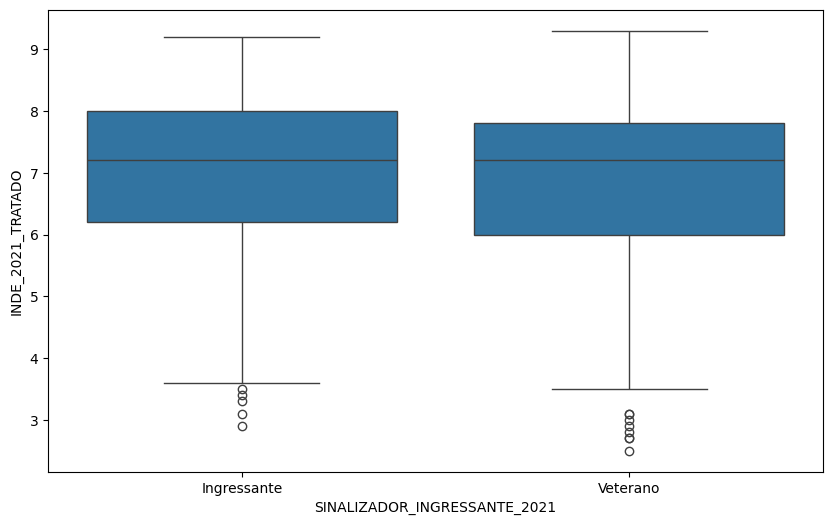

In [628]:
# grafico do inde por SINALIZADOR_INGRESSANTE_2021
plt.figure(figsize=(10, 6))
sns.boxplot(x='SINALIZADOR_INGRESSANTE_2021', y='INDE_2021_TRATADO', data=df_2021)

In [629]:
# quantos alunos tem por instituicao de ensino
df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,555
Rede Decisão,127
Escola JP II,2


In [630]:
# inde por instituicao de ensino
df_2021.groupby('INSTITUICAO_ENSINO_ALUNO_2021')['INDE_2021_TRATADO'].mean()

,INDE_2021_TRATADO
INSTITUICAO_ENSINO_ALUNO_2021,
Escola JP II,4.050000
Escola Pública,6.724685
Rede Decisão,7.646457


<Axes: xlabel='INSTITUICAO_ENSINO_ALUNO_2021', ylabel='INDE_2021_TRATADO'>

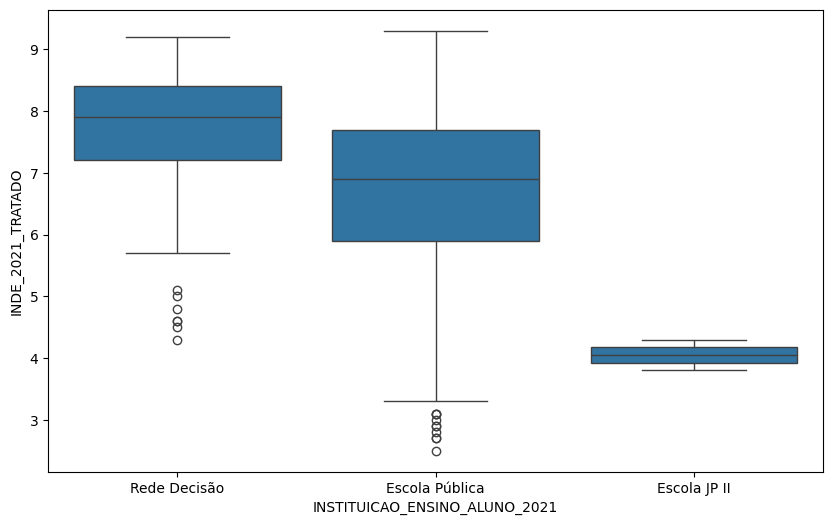

In [631]:
# gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='INSTITUICAO_ENSINO_ALUNO_2021', y='INDE_2021_TRATADO', data=df_2021)

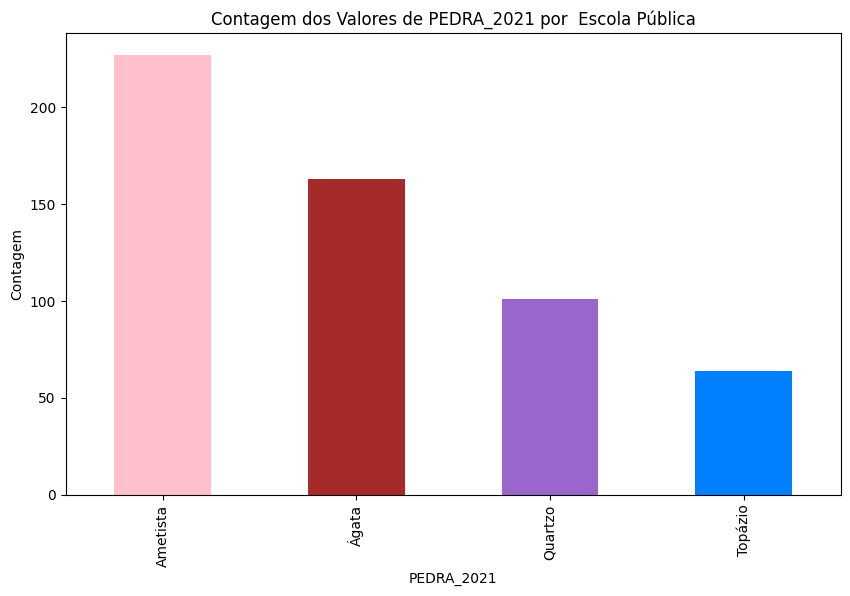

In [632]:
inst_publi_pedra_counts_2021 = df_2021.query("INSTITUICAO_ENSINO_ALUNO_2021 == 'Escola Pública'")['PEDRA_2021'].value_counts()

colors = ['#FFC0CB', '#A52A2A', '#9966CC', '#007FFF']
#df_y = df_y.value_counts()
plt.figure(figsize= (10,6))
inst_publi_pedra_counts_2021.plot(kind='bar', color=colors)
plt.title('Contagem dos Valores de PEDRA_2021 por  Escola Pública')
plt.xlabel('PEDRA_2021')
plt.ylabel('Contagem')
plt.show()

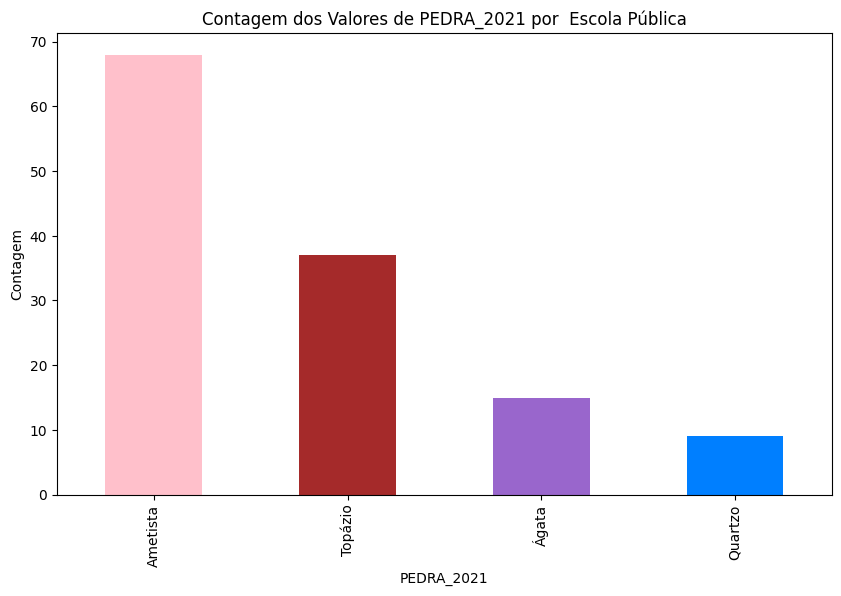

In [633]:
inst_priv_pedra_counts_2021 = df_2021.query("INSTITUICAO_ENSINO_ALUNO_2021 != 'Escola Pública'")['PEDRA_2021'].value_counts()

colors = ['#FFC0CB', '#A52A2A', '#9966CC', '#007FFF']
#df_y = df_y.value_counts()
plt.figure(figsize= (10,6))
inst_priv_pedra_counts_2021.plot(kind='bar', color=colors)
plt.title('Contagem dos Valores de PEDRA_2021 por  Escola Pública')
plt.xlabel('PEDRA_2021')
plt.ylabel('Contagem')
plt.show()

In [634]:
melhores_alunos_2021 = df_2021.query("INDE_2021_TRATADO > 6.8")
melhores_alunos_2021.head() # 502 alunos

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,7.3
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,7.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,7.4
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,8.3
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,9.0


In [635]:
piores_alunos_2021 = df_2021.query("INDE_2021_TRATADO < 5.05")
piores_alunos_2021.head() # 502 alunos

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
12,ALUNO-13,0.0,T,Escola Pública,Ingressante,Quartzo,3.413,8.0,0.0,7.5,0.8,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,Não,6.0,5.0,Nível 1 (4o ano),-1.0,3.4
60,ALUNO-61,1.0,M,Escola Pública,Veterano,Quartzo,3.017,0.0,1.3,5.6,0.0,6.9,Mantido na Fase atual,Não avaliado,Mantido na Fase atual,Não avaliado,Não,5.1,5.0,Nível 2 (5o e 6o ano),-1.0,3.0
66,ALUNO-67,1.0,J,Escola Pública,Ingressante,Quartzo,4.939,7.4,3.3,7.5,1.1,8.3,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,6.1,5.0,Nível 2 (5o e 6o ano),-1.0,4.9
90,ALUNO-91,2.0,H,Escola Pública,Veterano,Quartzo,4.200,9.5,0.0,7.5,2.2,5.6,Mantido na Fase atual,Não avaliado,Não avaliado,Não avaliado,Não,2.5,10.0,Nível 2 (5o e 6o ano),0.0,4.2
94,ALUNO-95,4.0,F,Escola Pública,Veterano,Quartzo,4.957,8.3,5.6,7.5,1.3,6.9,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Não avaliado,Não,4.1,5.0,Nível 6 (2o EM),-2.0,5.0


In [636]:
melhores_alunos_2021[['PEDRA_2021', 'INDE_2021_TRATADO']].value_counts()

PEDRA_2021  INDE_2021_TRATADO
Ametista    8.0                  31
            7.4                  30
            7.2                  29
            7.3                  27
            7.5                  23
            7.9                  21
            7.6                  20
            7.1                  18
            7.8                  18
            7.0                  17
Topázio     8.3                  17
Ametista    8.1                  17
            6.9                  16
            7.7                  16
Topázio     8.4                  15
            8.5                  13
            8.8                  12
Ametista    8.2                  12
Ágata       6.9                  11
Topázio     8.9                  10
            8.6                   8
            8.7                   8
            9.0                   7
            9.1                   5
            9.2                   3
            8.2                   2
            9.3                   1
Name: count, dtype: int64

In [637]:
melhores_alunos_2021[['PEDRA_2021', 'SINALIZADOR_INGRESSANTE_2021']].value_counts()

PEDRA_2021  SINALIZADOR_INGRESSANTE_2021
Ametista    Veterano                        187
            Ingressante                     108
Topázio     Veterano                         59
            Ingressante                      42
Ágata       Veterano                          8
            Ingressante                       3
Name: count, dtype: int64

In [638]:
piores_alunos_2021[['PEDRA_2021', 'SINALIZADOR_INGRESSANTE_2021']].value_counts()

PEDRA_2021  SINALIZADOR_INGRESSANTE_2021
Quartzo     Veterano                        53
            Ingressante                     24
Name: count, dtype: int64

In [639]:
teste = df_2020.merge(df_2021, on='NOME')


In [640]:
teste.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.9,8.50,7.50,7.00,5.94,7.75,2,2H,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,7.3
1,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,7.9,7.92,7.50,5.50,8.12,8.11,3,3H,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,7.0
2,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,8.1,7.50,7.50,7.50,8.44,8.17,2,2M,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,7.4
3,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,8.4,8.33,4.38,7.33,8.75,8.94,4,4L,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,8.3
4,Escola Pública,ALUNO-11,8,0,0A,Sim,9.712504000000001,A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,9.000020000000001,10,8.125,10,10,10.00001,10,9.7,9.00,8.12,10.00,10.00,10.00,0,0A,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,9.0


In [641]:
teste[['NOME','PEDRA_2020','ANOS_PM_2020','INDE_2020_TRATADO','PEDRA_2021','INDE_2021_TRATADO','SINALIZADOR_INGRESSANTE_2021']].head()

,NOME,PEDRA_2020,ANOS_PM_2020,INDE_2020_TRATADO,PEDRA_2021,INDE_2021_TRATADO,SINALIZADOR_INGRESSANTE_2021
0,ALUNO-1,Ametista,2,7.9,Ametista,7.3,Ingressante
1,ALUNO-3,Ametista,2,7.9,Ametista,7.0,Veterano
2,ALUNO-5,Ametista,1,8.1,Ametista,7.4,Veterano
3,ALUNO-8,Ametista,3,8.4,Topázio,8.3,Veterano
4,ALUNO-11,Topázio,0,9.7,Topázio,9.0,Veterano


# 2022

In [642]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [643]:
# Alunos em cada ano
df_2022['ANO_INGRESSO_2022'].value_counts()

,count
ANO_INGRESSO_2022,
2022.0,398
2021.0,141
2019.0,139
2018.0,67
2020.0,48
2017.0,40
2016.0,29


<Axes: xlabel='ANO_INGRESSO_2022'>

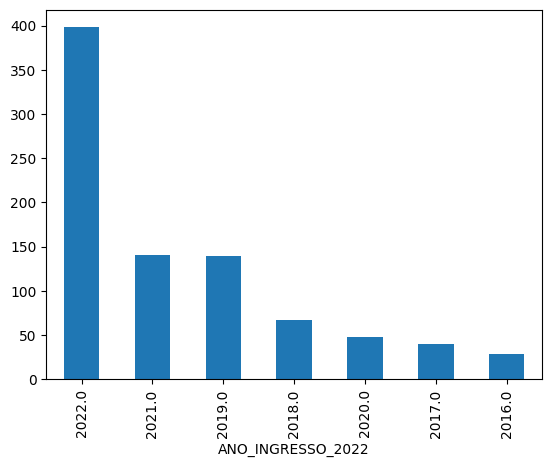

In [644]:
#grafico de alunos em cada ano
df_2022['ANO_INGRESSO_2022'].value_counts().plot(kind='bar')

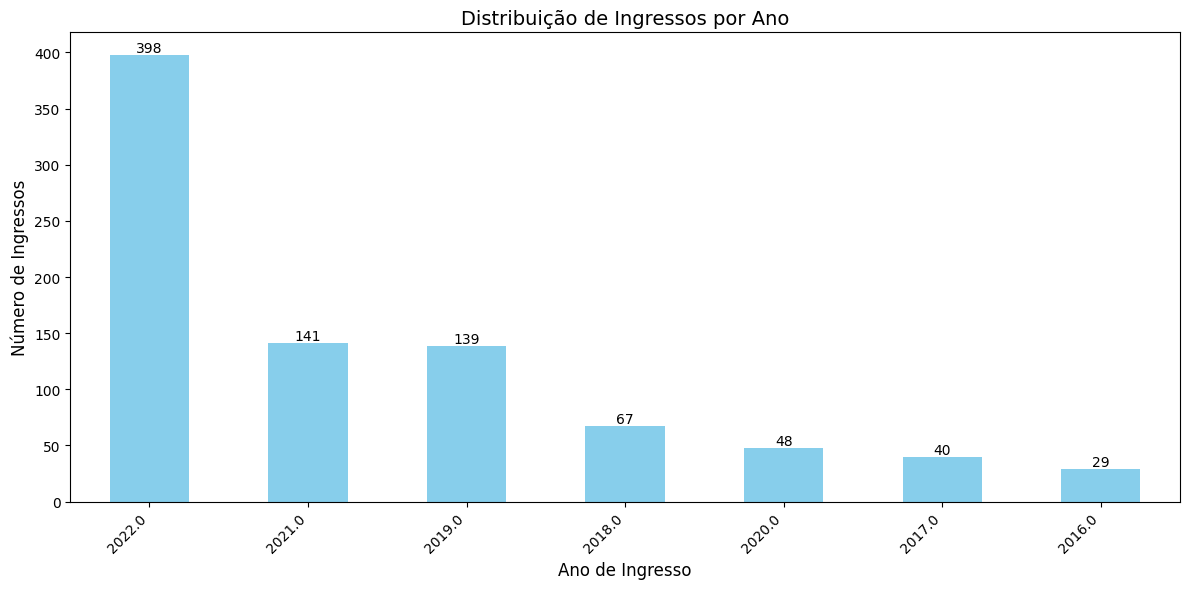

In [645]:


# Contagem de valores
contagem_anos = df_2022['ANO_INGRESSO_2022'].value_counts()

# Criação do gráfico
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
ax = contagem_anos.plot(kind='bar', color='skyblue') # Defini o tipo do gráfico, uma cor e armazena na variavel ax

# Adiciona rótulos aos eixos e título
plt.title('Distribuição de Ingressos por Ano', fontsize=14)
plt.xlabel('Ano de Ingresso', fontsize=12)
plt.ylabel('Número de Ingressos', fontsize=12)

# Adiciona números em cima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)


# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar que os rótulos se sobreponham
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [646]:
#alunos por fase
df_2022['FASE_2022'].value_counts()

,count
FASE_2022,
1.0,192
0.0,190
2.0,155
3.0,148
4.0,76
5.0,60
7.0,23
6.0,18


In [647]:
df_2022['ANO_INGRESSO_2022'].value_counts()

,count
ANO_INGRESSO_2022,
2022.0,398
2021.0,141
2019.0,139
2018.0,67
2020.0,48
2017.0,40
2016.0,29


In [648]:
# query trazer somente ingressantes em 2022
df_2022_ingressantes_teste = df_2022.query("ANO_INGRESSO_2022 == '2022'")

In [649]:
df_2022_ingressantes_teste.shape

(0, 31)

In [650]:
df_2022.columns

Index(['NOME', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

In [651]:
df_2022.loc[df_2022['ANO_INGRESSO_2022'] == 2022.0]

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.62500,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.25000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.25000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.93750,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)
8,ALUNO-9,0.0,Z,2022.0,Não,5.665746,767.0,184.0,9.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,9.00002,6.820378,5.0,2.133333,2.466667,1.800000,NaN,2.0,3.75000,Mantido na Fase atual,Mantido na Fase atual,NaN,NaN,Não,Não,5.500010,10.0,ALFA (2º e 3º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,ALUNO-1337,3.0,M,2022.0,Não,6.150757,702.0,96.0,11.0,Ágata,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,9.16668,5.212121,7.5,6.500000,7.000000,6.000000,NaN,4.0,6.25000,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Alocado em Fase anterior,Não,Não,5.083325,5.0,Fase 4 (9º ano)
1339,ALUNO-1340,3.0,L,2022.0,Não,5.030804,819.0,127.0,6.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,9.58335,5.773810,7.5,0.000000,NaN,NaN,NaN,4.0,7.34375,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.916663,2.5,Fase 8 (Universitários)
1341,ALUNO-1342,2.0,K,2022.0,Não,8.150001,99.0,13.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.5,7.750000,6.000000,9.500000,NaN,3.0,6.25000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
1345,ALUNO-1346,0.0,U,2022.0,Não,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.5,9.000000,9.166667,8.833333,NaN,2.0,5.62500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano)


In [652]:
df_2022_ingressantes =  df_2022.loc[df_2022['ANO_INGRESSO_2022'] == 2022.0]

In [653]:
df_2022_ingressantes.shape

(398, 31)

In [654]:
# ingressantes por fase
df_2022_ingressantes['FASE_2022'].value_counts()

,count
FASE_2022,
0.0,140
1.0,85
2.0,70
3.0,62
5.0,19
4.0,12
7.0,8
6.0,2


In [655]:
# alunos ingressantes diferente de 2022
df_alunos_veteranos_2022 = df_2022.loc[df_2022['ANO_INGRESSO_2022'] != 2022.0]

In [656]:
df_alunos_veteranos_2022.shape

(464, 31)

In [657]:
df_alunos_veteranos_2022['ANO_INGRESSO_2022'].value_counts()

,count
ANO_INGRESSO_2022,
2021.0,141
2019.0,139
2018.0,67
2020.0,48
2017.0,40
2016.0,29


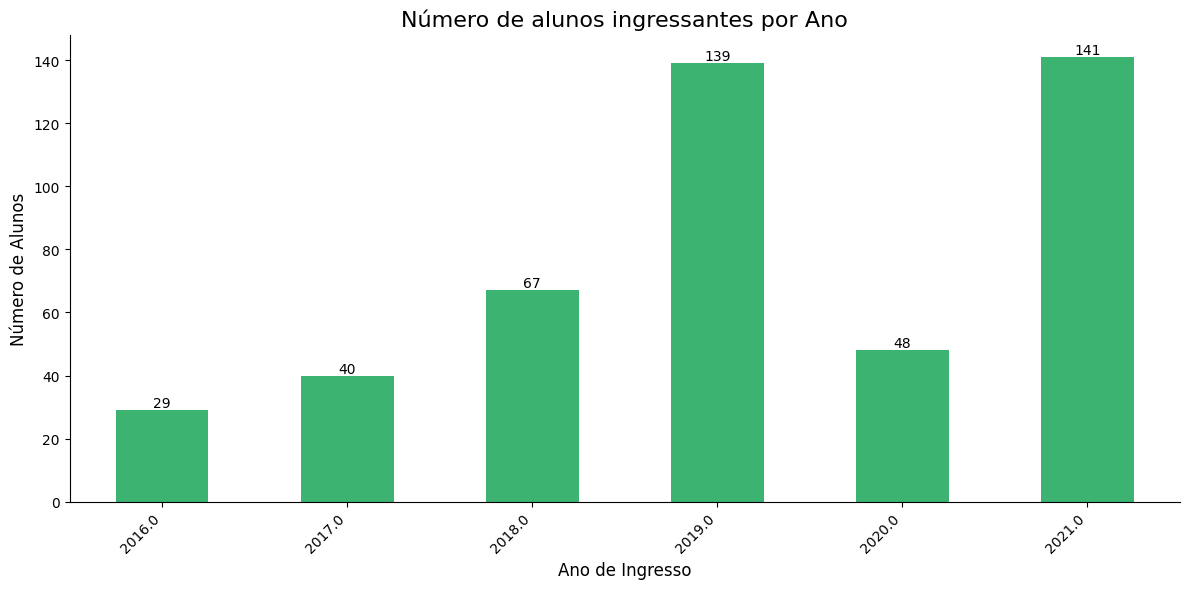

In [658]:
# gráfico de média de alunos por ano


# Contagem de alunos por ano e ordenação
anos_counts = df_alunos_veteranos_2022['ANO_INGRESSO_2022'].value_counts().sort_index()

# Configuração do tamanho da figura
plt.figure(figsize=(12, 6))  # Ajuste para um tamanho maior

# Criação do gráfico de barras
bars = anos_counts.plot(kind='bar', color='mediumseagreen') # Escolha uma cor agradável

# Adição de título e rótulos
plt.title('Número de alunos ingressantes por Ano', fontsize=16)
plt.xlabel('Ano de Ingresso', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)

# Rotação dos rótulos do eixo X
plt.xticks(rotation=45, ha='right')

# Adição de anotações
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10) # Usar int(yval)

# Remove as bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajuste do layout
plt.tight_layout()

# Exibição do gráfico
plt.show()

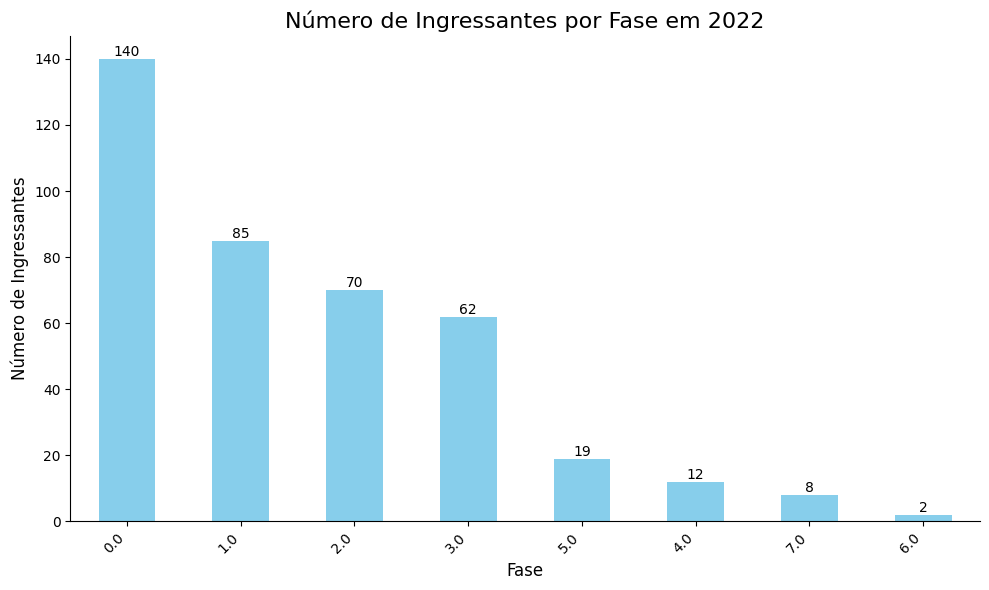

In [659]:
# grafico de ingressantes por fase

# Contagem de ingressantes por fase e ordenação
fases_counts = df_2022_ingressantes['FASE_2022'].value_counts().sort_values(ascending=False)

# Configuração do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do gráfico de barras
bars = fases_counts.plot(kind='bar', color='skyblue')  # Cor das barras

# Adição de título e rótulos
plt.title('Número de Ingressantes por Fase em 2022', fontsize=16)
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Número de Ingressantes', fontsize=12)

# Rotação dos rótulos do eixo X
plt.xticks(rotation=45, ha='right')

# Adição de anotações (número de ingressantes em cada barra)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Remove as bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajuste do layout para evitar cortes
plt.tight_layout()

# Exibição do gráfico
plt.show()

In [660]:
df_2022.shape

(862, 31)

In [661]:
df_2022['INDE_2022_TRATADO'] = df_2022['INDE_2022'].astype(float)
df_2022['IAA_2022_TRATADO'] = df_2022['IAA_2022'].astype(float)
df_2022['IEG_2022_TRATADO'] = df_2022['IEG_2022'].astype(float)
df_2022['IPS_2022_TRATADO'] = df_2022['IPS_2022'].astype(float)
df_2022['IDA_2022_TRATADO'] = df_2022['IDA_2022'].astype(float)
df_2022['NOTA_PORT_2022_TRATADO'] = df_2022['NOTA_PORT_2022'].astype(float)
df_2022['NOTA_MAT_2022_TRATADO'] = df_2022['NOTA_MAT_2022'].astype(float)
df_2022['NOTA_ING_2022_TRATADO'] = df_2022['NOTA_ING_2022'].astype(float)
df_2022['IPP_2022_TRATADO'] = df_2022['IPP_2022'].astype(float)
df_2022['IPV_2022_TRATADO'] = df_2022['IPV_2022'].astype(float)

df_2022['IAA_2022_TRATADO'] = df_2022['IAA_2022_TRATADO'].map('{:.1f}'.format)
df_2022['IEG_2022_TRATADO'] = df_2022['IEG_2022_TRATADO'].map('{:.1f}'.format)
df_2022['IPS_2022_TRATADO'] = df_2022['IPS_2022_TRATADO'].map('{:.1f}'.format)
df_2022['IDA_2022_TRATADO'] = df_2022['IDA_2022_TRATADO'].map('{:.1f}'.format)
df_2022['NOTA_PORT_2022_TRATADO'] = df_2022['NOTA_PORT_2022_TRATADO'].map('{:.1f}'.format)
df_2022['NOTA_MAT_2022_TRATADO'] = df_2022['NOTA_MAT_2022_TRATADO'].map('{:.1f}'.format)
df_2022['IPP_2022_TRATADO'] = df_2022['IPP_2022_TRATADO'].map('{:.1f}'.format)
df_2022['IPV_2022_TRATADO'] = df_2022['IPV_2022_TRATADO'].map('{:.1f}'.format)

In [662]:
df_2022['INDE_2022_TRATADO'] = df_2022['INDE_2022_TRATADO'].map('{:.1f}'.format)


In [663]:
df_2022['NOTA_ING_2022_TRATADO'] =df_2022['NOTA_ING_2022_TRATADO'].map('{:.1f}'.format)


In [664]:
df_2022['ANO_INGRESSO_2022'].map('{:.0f}'.format)

,ANO_INGRESSO_2022
1,2022
3,2022
4,2019
5,2022
6,2022
...,...
1341,2022
1342,2018
1345,2022
1347,2018


In [665]:
# ALTERAR O CAMPO ANO_INGRESSO_2022 PARA REMOVER O ZERO DEPOIS DO PONTO
#df_2022['ANO_INGRESSO_2022'] = df_2022['ANO_INGRESSO_2022'].str.replace('.0', '', regex=False) #não é string
df_2022['ANO_INGRESSO_2022'] = df_2022['ANO_INGRESSO_2022'].map('{:.0f}'.format)

In [666]:
df_2022['BOLSISTA_2022'].value_counts()

,count
BOLSISTA_2022,
Não,754
Sim,108


In [667]:
# alunos indicados a bolsa
df_2022['INDICADO_BOLSA_2022'].value_counts()

,count
INDICADO_BOLSA_2022,
Não,730
Sim,132


*alunos bolsistas nao recorreram a indicações de bolsa, logo 754 alunos nao bolsistas.
 Desses, 132 foram indicados, e 730 não considerando que ja existia 108 alunos indicados*

In [668]:
df_2022_bolsistas = df_2022.loc[df_2022['BOLSISTA_2022'] == 'Sim']

In [669]:
df_2022_bolsistas.shape

(108, 41)

In [670]:
df_2022_bolsistas.loc[df_2022_bolsistas['INDICADO_BOLSA_2022'] == 'Sim']

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,INDE_2022_TRATADO,IAA_2022_TRATADO,IEG_2022_TRATADO,IPS_2022_TRATADO,IDA_2022_TRATADO,NOTA_PORT_2022_TRATADO,NOTA_MAT_2022_TRATADO,NOTA_ING_2022_TRATADO,IPP_2022_TRATADO,IPV_2022_TRATADO


In [671]:
df_2022['IAN_2022'].value_counts()

,count
IAN_2022,
5.0,575
10.0,259
2.5,28


In [672]:
df_2022_n_bolsistas = df_2022.loc[df_2022['BOLSISTA_2022'] == 'Não']

In [673]:
df_2022_n_bolsistas['INDICADO_BOLSA_2022'].value_counts()

,count
INDICADO_BOLSA_2022,
Não,622
Sim,132


In [674]:
alunos_n_bolsistas_indicados = df_2022_n_bolsistas.loc[df_2022_n_bolsistas['INDICADO_BOLSA_2022'] == 'Sim']

In [675]:
alunos_n_bolsistas_indicados['INDE_2022_TRATADO'] = alunos_n_bolsistas_indicados['INDE_2022_TRATADO'].astype(float)

<ipython-input-675-ee8997cef885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_n_bolsistas_indicados['INDE_2022_TRATADO'] = alunos_n_bolsistas_indicados['INDE_2022_TRATADO'].astype(float)


In [676]:
alunos_n_bolsistas_indicados.shape

(132, 41)

In [677]:
# média do INDE desses alunos
alunos_n_bolsistas_indicados['INDE_2022_TRATADO'].mean()

7.415909090909091

In [678]:
# média do IPV
alunos_n_bolsistas_indicados['IPV_2022'].mean()

7.857534507575758

In [679]:
# média do IAA
alunos_n_bolsistas_indicados['IAA_2022'].mean()

8.050516060606059

In [680]:
# média do IAN
alunos_n_bolsistas_indicados['IAN_2022'].mean()

6.15530303030303

In [681]:
# média do IPP
alunos_n_bolsistas_indicados['IPP_2022'].mean()

7.134627525252526

In [682]:
# média do IPS
alunos_n_bolsistas_indicados['IPS_2022'].mean()

7.211174242424242

In [683]:
# média do IEG
alunos_n_bolsistas_indicados['IEG_2022'].mean()

8.065361768845571

In [684]:
# média do IDA
alunos_n_bolsistas_indicados['IDA_2022'].mean()

6.870454545454545

In [685]:
# média por pedra
alunos_n_bolsistas_indicados['PEDRA_2022'].value_counts()

,count
PEDRA_2022,
Ametista,59
Topázio,33
Ágata,29
Quartzo,11


<Axes: xlabel='PEDRA_2022', ylabel='INDE_2022_TRATADO'>

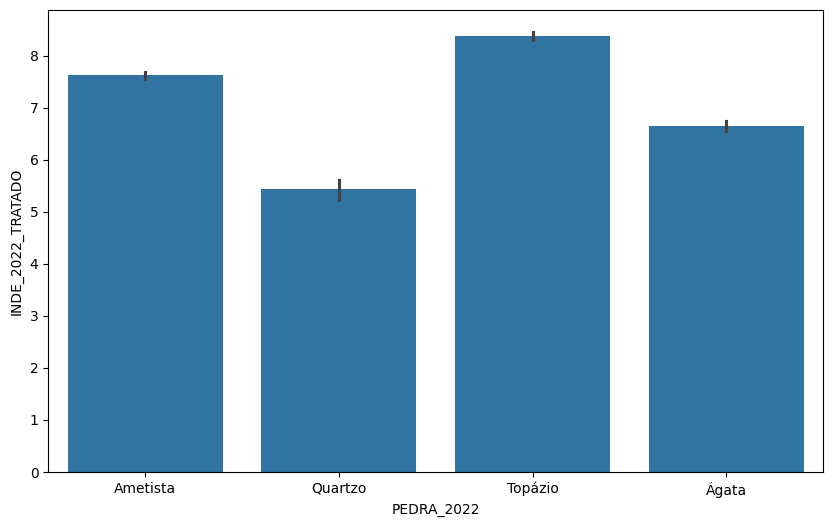

In [686]:
# plotar média por pedra para alunos_n_bolsistas_indicados
plt.figure(figsize=(10, 6))
sns.barplot(x='PEDRA_2022', y='INDE_2022_TRATADO', data=alunos_n_bolsistas_indicados)


In [687]:
alunos_n_bolsistas_indicados.groupby('PEDRA_2022')['INDE_2022_TRATADO'].mean().sort_values(ascending=False)

,INDE_2022_TRATADO
PEDRA_2022,
Topázio,8.375758
Ametista,7.628814
Ágata,6.644828
Quartzo,5.427273


<ipython-input-688-731d1ca60a85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='PEDRA_2022', y='INDE_2022_TRATADO', data=media_por_pedra, palette='viridis')


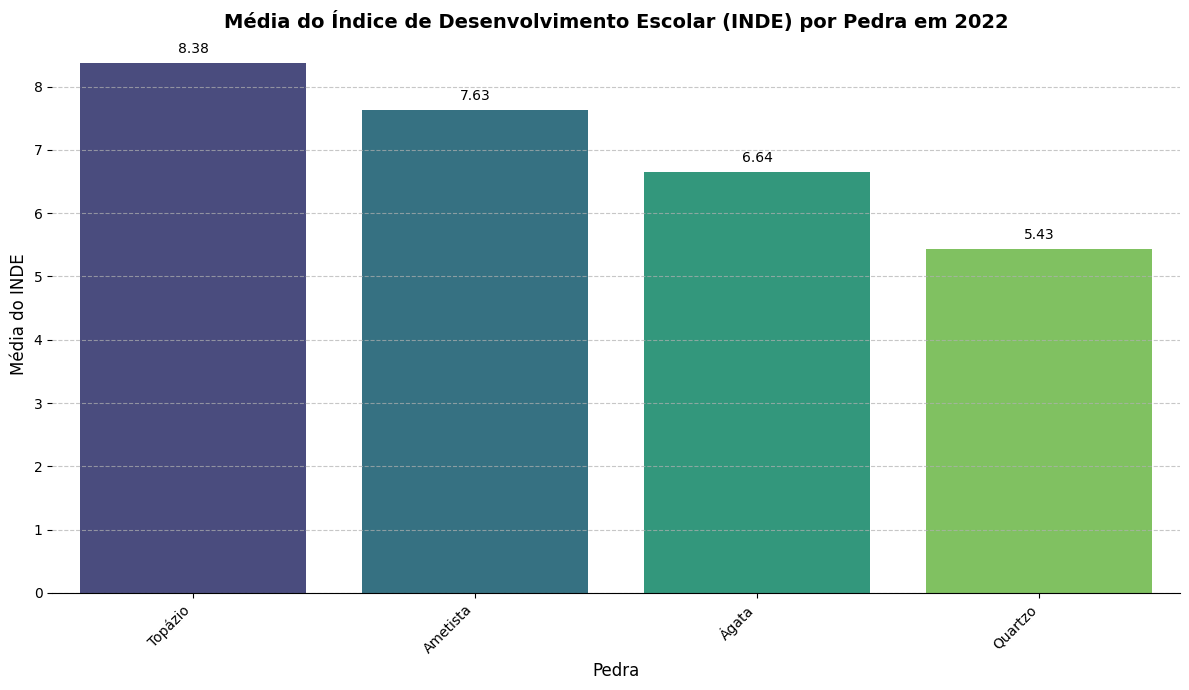

In [688]:

# Calcular a média de INDE por PEDRA_2022
media_por_pedra = alunos_n_bolsistas_indicados.groupby('PEDRA_2022')['INDE_2022_TRATADO'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='PEDRA_2022', y='INDE_2022_TRATADO', data=media_por_pedra, palette='viridis')

# Adicionar título e rótulos
plt.title('Média do Índice de Desenvolvimento Escolar (INDE) por Pedra em 2022', fontsize=14, fontweight='bold')
plt.xlabel('Pedra', fontsize=12)
plt.ylabel('Média do INDE', fontsize=12)

# Melhorar a aparência das legendas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajustar as bordas e adicionar grade de fundo
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar anotações sobre as barras (opcional)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

<ipython-input-689-e72dbab30501>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='PEDRA_2022', y='INDE_2022_TRATADO', data=media_por_pedra, palette=cores)


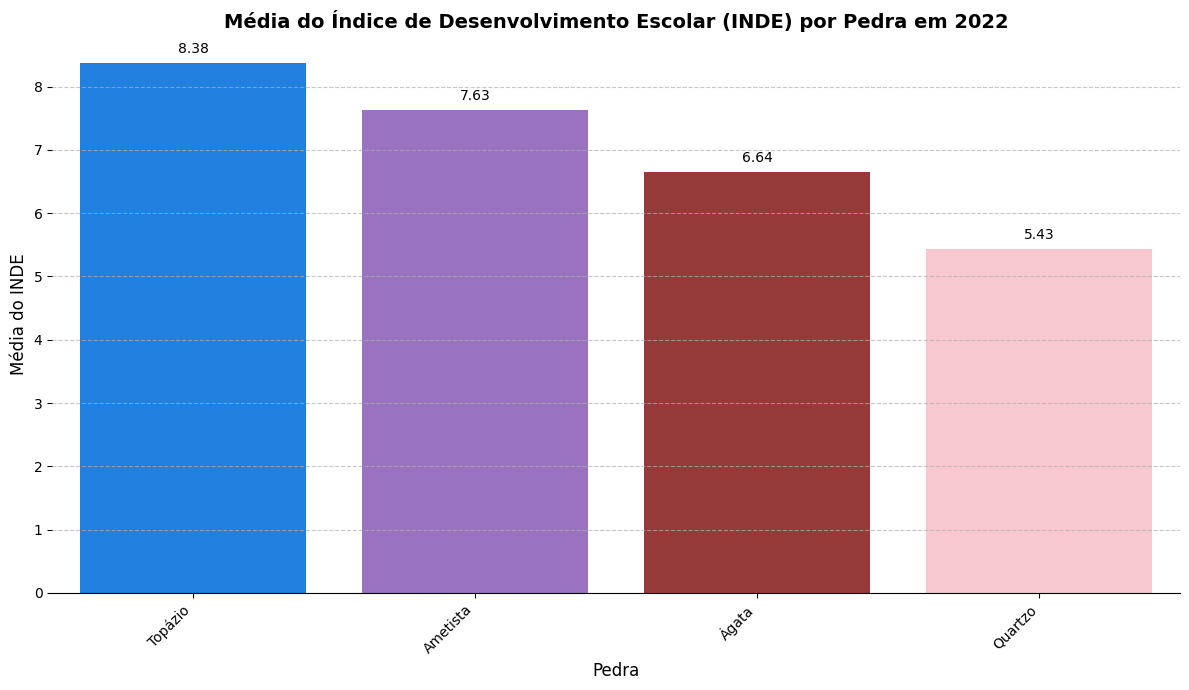

In [689]:

# Calcular a média de INDE por PEDRA_2022
media_por_pedra = alunos_n_bolsistas_indicados.groupby('PEDRA_2022')['INDE_2022_TRATADO'].mean().sort_values(ascending=False).reset_index()
# colors = ['#9966CC','#A52A2A', '#FFC0CB',   '#007FFF']

# Definir um dicionário de cores para cada pedra
cores_pedras = {
    'Ágata': '#A52A2A',      # Cor marrom para Ágata
    'Topázio': '#007FFF',      # Cor azul para Topázio
    'Ametista': '#9966CC',   # Cor roxa para Ametista
    'Quartzo': '#FFC0CB'  # Cor rosa claro para Quartzo
}

# Criar o gráfico de barras
plt.figure(figsize=(12, 7))

# Criar uma lista de cores com base na ordem das pedras no DataFrame
cores = [cores_pedras[pedra] for pedra in media_por_pedra['PEDRA_2022']]

ax = sns.barplot(x='PEDRA_2022', y='INDE_2022_TRATADO', data=media_por_pedra, palette=cores)


# Adicionar título e rótulos
plt.title('Média do Índice de Desenvolvimento Escolar (INDE) por Pedra em 2022', fontsize=14, fontweight='bold')
plt.xlabel('Pedra', fontsize=12)
plt.ylabel('Média do INDE', fontsize=12)

# Melhorar a aparência das legendas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajustar as bordas e adicionar grade de fundo
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar anotações sobre as barras (opcional)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [690]:
df_2022['INDE_2022_TRATADO'] = df_2022['INDE_2022_TRATADO'].astype(float)

In [691]:
#média do INDE entre alunos bolsistas
df_2022.groupby('BOLSISTA_2022')['INDE_2022_TRATADO'].mean()

,INDE_2022_TRATADO
BOLSISTA_2022,
Não,6.932361
Sim,7.697222


<Axes: xlabel='BOLSISTA_2022', ylabel='INDE_2022_TRATADO'>

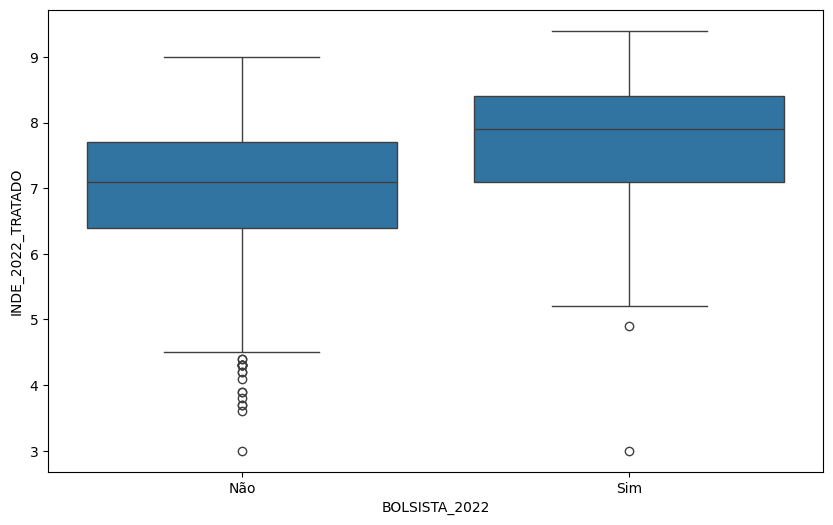

In [692]:
# plotar média do INDE entre alunos bolsista
plt.figure(figsize=(10, 6))
sns.boxplot(x='BOLSISTA_2022', y='INDE_2022_TRATADO', data=df_2022)

<ipython-input-693-f1184af7bb22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BOLSISTA_2022', y='INDE_2022_TRATADO', data=df_2022, palette="viridis") # Usei uma paleta de cores agradável


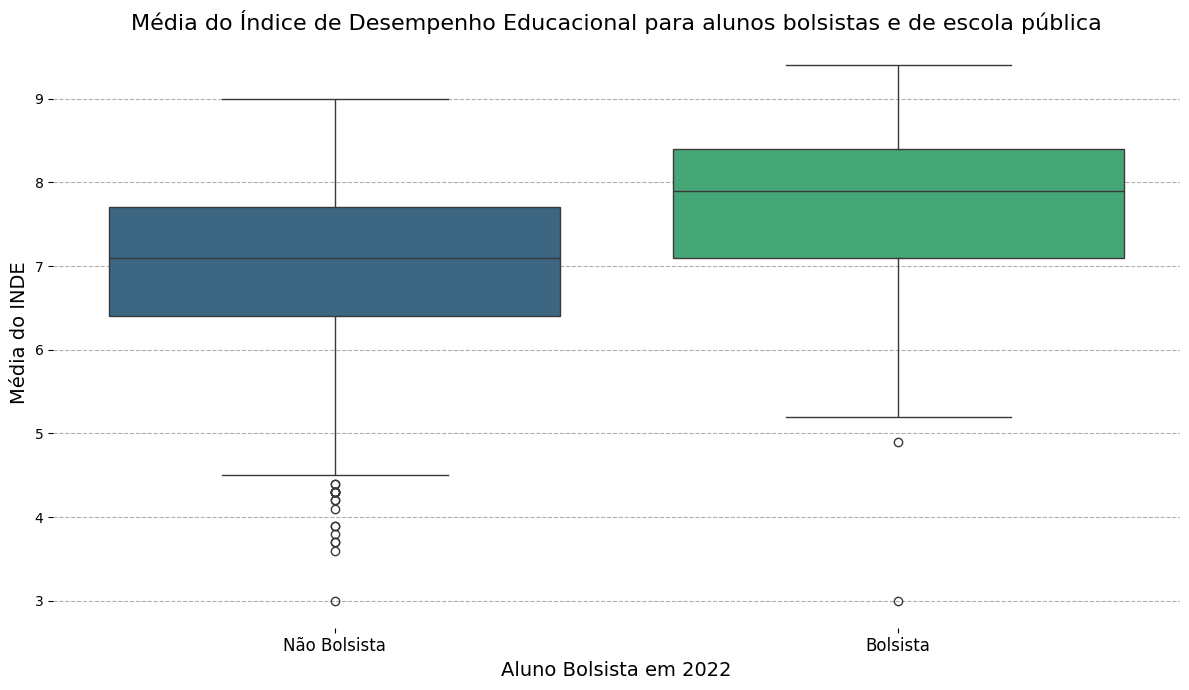

In [693]:


plt.figure(figsize=(12, 7)) # Aumentei um pouco o tamanho para melhorar a visualização
sns.boxplot(x='BOLSISTA_2022', y='INDE_2022_TRATADO', data=df_2022, palette="viridis") # Usei uma paleta de cores agradável
plt.title('Média do Índice de Desempenho Educacional para alunos bolsistas e de escola pública', fontsize=16) # Título claro e descritivo
plt.xlabel('Aluno Bolsista em 2022', fontsize=14) # Rótulo do eixo x com tamanho de fonte adequado
plt.ylabel('Média do INDE', fontsize=14) # Rótulo do eixo y com tamanho de fonte adequado e abreviação
plt.xticks([0, 1], ['Não Bolsista', 'Bolsista'], fontsize=12) # Rótulos para os valores do eixo x (mais descritivos)
plt.grid(axis='y', linestyle='--') # Grade para facilitar a leitura dos valores de INDE
sns.despine(left=True, bottom=True) # Remove as bordas laterais para um visual mais limpo
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

<ipython-input-694-5011f709d2fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BOLSISTA_2022', y='INDE_2022_TRATADO', data=alunos_n_bolsistas_indicados, palette="viridis") # Usei uma paleta de cores agradável


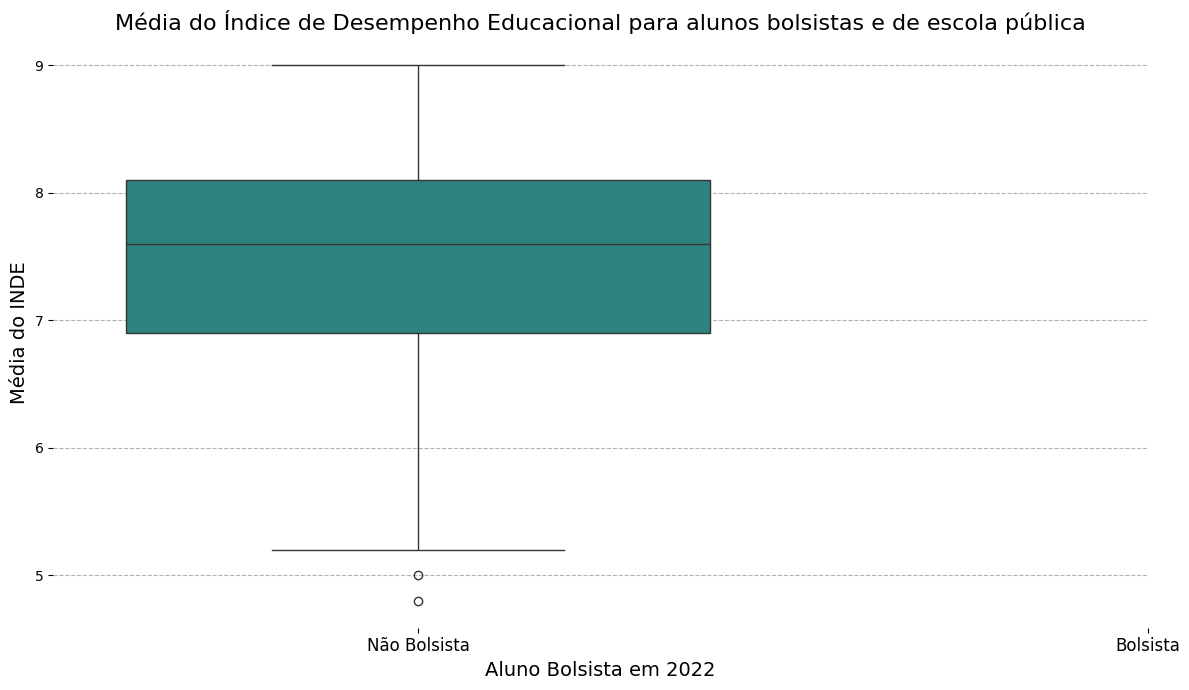

In [694]:

plt.figure(figsize=(12, 7)) # Aumentei um pouco o tamanho para melhorar a visualização
sns.boxplot(x='BOLSISTA_2022', y='INDE_2022_TRATADO', data=alunos_n_bolsistas_indicados, palette="viridis") # Usei uma paleta de cores agradável
plt.title('Média do Índice de Desempenho Educacional para alunos bolsistas e de escola pública', fontsize=16) # Título claro e descritivo
plt.xlabel('Aluno Bolsista em 2022', fontsize=14) # Rótulo do eixo x com tamanho de fonte adequado
plt.ylabel('Média do INDE', fontsize=14) # Rótulo do eixo y com tamanho de fonte adequado e abreviação
plt.xticks([0, 1], ['Não Bolsista', 'Bolsista'], fontsize=12) # Rótulos para os valores do eixo x (mais descritivos)
plt.grid(axis='y', linestyle='--') # Grade para facilitar a leitura dos valores de INDE
sns.despine(left=True, bottom=True) # Remove as bordas laterais para um visual mais limpo
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

In [695]:
# MÉDIA DE CADA INDICADOR PARA ALUNOS INDICADOS IDA, IEG, IAN, IAA, IPV, IPS, IPP
num_indicators_2022 = ['INDE_2022_TRATADO', 'IPV_2022', 'IPP_2022', 'IPS_2022', 'IDA_2022', 'IEG_2022', 'IAN_2022', 'IAA_2022']

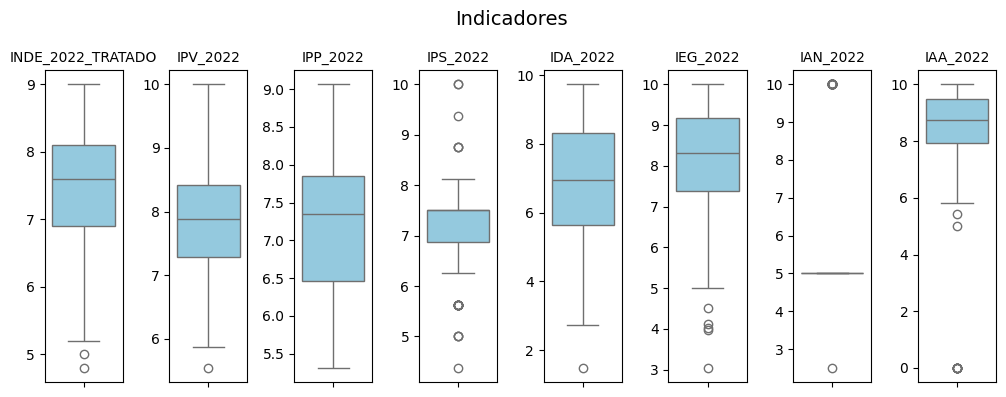

In [696]:
# Indicadores para os alunos indicados a bolsa
fig, axs = plt.subplots(1, num_indicators_2022.__len__(), figsize=(10, 4))

fig.suptitle('Indicadores', fontsize=14)
for i, indicator in enumerate(num_indicators_2022):
    sns.boxplot(data=alunos_n_bolsistas_indicados, y=indicator, ax=axs[i], color='skyblue')
    axs[i].set_title(indicator, fontsize=10)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
plt.tight_layout()
plt.show()

In [697]:
df_2022_merge = df_2022.merge(teste, on='NOME')
#quero fazer o merge em tres datasets

*ao fazer o merge por NOME do aluno, somente os alunos que estiveram nos 3 anos, 2020, 2021 e 2022 aparecerão no df_2022_merge isso ja ajuda a levantar casos de desistencia e numeros de alunos que continuaram na associação*

In [698]:
df_2022_merge.shape

(314, 88)

In [699]:
df_2022_merge.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,INDE_2022_TRATADO,IAA_2022_TRATADO,IEG_2022_TRATADO,IPS_2022_TRATADO,IDA_2022_TRATADO,NOTA_PORT_2022_TRATADO,NOTA_MAT_2022_TRATADO,NOTA_ING_2022_TRATADO,IPP_2022_TRATADO,IPV_2022_TRATADO,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO
0,ALUNO-5,2.0,L,2019,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),7.2,6.4,8.6,7.5,7.1,6.7,7.5,nan,6.5,7.8,Escola Pública,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,8.1,7.50,7.50,7.50,8.44,8.17,2,2M,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,7.4
1,ALUNO-8,5.0,K,2017,Sim,7.289795,397.0,26.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.16668,8.268065,5.000,7.144444,6.500000,7.666667,7.266667,4.0,7.656250,Promovido de Fase + Bolsa,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Não,Não,7.625002,5.0,Fase 6 (2º EM),7.3,9.2,8.3,5.0,7.1,6.5,7.7,7.3,7.7,7.6,Rede Decisão/União,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,8.4,8.33,4.38,7.33,8.75,8.94,4,4L,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,8.3
2,ALUNO-11,1.0,A,2020,Sim,8.464687,40.0,5.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,8.00002,9.198413,7.500,9.833333,10.000000,9.666667,NaN,3.0,7.083333,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,NaN,Não,Sim,9.500010,5.0,Fase 2 (5º e 6º ano),8.5,8.0,9.2,7.5,9.8,10.0,9.7,nan,7.1,9.5,Escola Pública,8,0,0A,Sim,9.712504000000001,A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,9.000020000000001,10,8.125,10,10,10.00001,10,9.7,9.00,8.12,10.00,10.00,10.00,0,0A,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,9.0
3,ALUNO-17,1.0,G,2018,Não,6.723326,580.0,

In [700]:
df_indicadores = df_2022_merge[['NOME',
                                'IAA_2020_TRATADO',
                                'IEG_2020',
                                'IPS_2020_TRATADO',
                                'IDA_2020_TRATADO',
                                'IPP_2020_TRATADO',
                                'IPV_2020_TRATADO',
                                'IAN_2020',
                                'INDE_2020_TRATADO',
                                'PEDRA_2020',

                                'IAA_2021',
                                'IEG_2021',
                                'IPS_2021',
                                'IDA_2021',
                                'IPP_2021',
                                'IPV_2021',
                                'IAN_2021',
                                'INDE_2021',
                                'PEDRA_2021',

                                'IAA_2022_TRATADO',
                                'IEG_2022_TRATADO',
                                'IPS_2022_TRATADO',
                                'IDA_2022_TRATADO',
                                'IPP_2022_TRATADO',
                                'IPV_2022_TRATADO',
                                'IAN_2022',
                                'INDE_2022_TRATADO',
                                'PEDRA_2022'
                                ]]

In [701]:
df_indicadores.head()

,NOME,IAA_2020_TRATADO,IEG_2020,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,IAN_2020,INDE_2020_TRATADO,PEDRA_2020,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,IAA_2022_TRATADO,IEG_2022_TRATADO,IPS_2022_TRATADO,IDA_2022_TRATADO,IPP_2022_TRATADO,IPV_2022_TRATADO,IAN_2022,INDE_2022_TRATADO,PEDRA_2022
0,ALUNO-5,7.50,8,7.50,7.50,8.44,8.17,10,8.1,Ametista,7.4,7.5,7.5,5.4,8.5,7.4,10.0,7.399,Ametista,6.4,8.6,7.5,7.1,6.5,7.8,5.0,7.2,Ametista
1,ALUNO-8,8.33,9.9,4.38,7.33,8.75,8.94,10,8.4,Ametista,8.8,8.6,7.5,7.1,8.0,8.5,10.0,8.269,Topázio,9.2,8.3,5.0,7.1,7.7,7.6,5.0,7.3,Ametista
2,ALUNO-11,9.00,10,8.12,10.00,10.00,10.00,10,9.7,Topázio,9.0,10.0,6.3,8.8,7.7,9.7,10.0,8.990,Topázio,8.0,9.2,7.5,9.8,7.1,9.5,5.0,8.5,Topázio
3,ALUNO-17,9.50,6.8,7.50,10.00,6.56,7.75,5,7.8,Ametista,9.5,4.2,7.5,2.6,8.4,8.8,5.0,6.140,Ágata,9.5,6.6,7.5,5.5,5.9,7.5,5.0,6.7,Ágata
4,ALUNO-18,9.58,7,7.50,6.50,7.08,7.94,5,7.2,Ágata,10.0,3.3,6.3,5.3,7.7,5.2,5.0,5.666,Ágata,0.0,6.3,8.1,5.2,7.8,7.2,5.0,5.8,Quartzo


In [702]:
df_indicadores = df_indicadores.to_excel('df_indicadores.xlsx', index=False)

In [703]:
# novo dataset df_alunos_performance
# nome, instituicao_ensino_aluno_2020, ano_ingresso_2022,INDE_2020 PEDRA_2020 PONTO_VIRADA_2020
# INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021, INDE_2021, PEDRA_2021,
# REC_EQUIPE_1_2021 REC_EQUIPE_2_2021 REC_EQUIPE_3_2021 REC_EQUIPE_4_2021	 PONTO_VIRADA_2021 NIVEL_IDEAL_2021 DEFASAGEM_2021
# bolsista_2022,NOTA_PORT_2022, NOTA_MAT_2022 ,NOTA_ING_2022, QTD_AVAL_2022,
# REC_AVA_1_2022 REC_AVA_2_2022 REC_AVA_3_2022  REC_AVA_4_2022 PONTO_VIRADA_2022 NIVEL_IDEAL_2022 indicado_bolsa_2022

df_alunos_performance = df_2022_merge[['NOME',
                                        'INSTITUICAO_ENSINO_ALUNO_2020',
                                        'ANO_INGRESSO_2022',
                                        'ANOS_PM_2020',
                                        'FASE_TURMA_2020',
                                        'INDE_2020_TRATADO',
                                        'PEDRA_2020',
                                        'PONTO_VIRADA_2020',
                                        'DESTAQUE_IEG_2020', # Indicador de Engajamento
                                        'DESTAQUE_IDA_2020', # Indicador de Aprendizagem
                                        'DESTAQUE_IPV_2020', # Indicador de Ponto de Virada
                                        # 2021
                                        'FASE_2021',
                                        'INSTITUICAO_ENSINO_ALUNO_2021',
                                        'INDE_2021_TRATADO',
                                        'PEDRA_2021',
                                        'SINALIZADOR_INGRESSANTE_2021',
                                      #  'NIVEL_IDEAL_2021',
                                        'REC_EQUIPE_1_2021',
                                        'REC_EQUIPE_2_2021',
                                        'REC_EQUIPE_3_2021',
                                        'REC_EQUIPE_4_2021',
                                       # 'REC_PSICO_2021',
                                        'PONTO_VIRADA_2021',
                                        'NIVEL_IDEAL_2021',
                                        'DEFASAGEM_2021',
                                        # 2022
                                        'FASE_2022',
                                        'BOLSISTA_2022',
                                        'NOTA_PORT_2022_TRATADO',
                                        'NOTA_MAT_2022_TRATADO',
                                        'NOTA_ING_2022_TRATADO',
                                        'QTD_AVAL_2022',
                                        'REC_AVA_1_2022',
                                        'REC_AVA_2_2022',
                                        'REC_AVA_3_2022',
                                        'REC_AVA_4_2022',
                                        'PONTO_VIRADA_2022',
                                        'INDICADO_BOLSA_2022',
                                        'INDE_2022_TRATADO',
                                        'PEDRA_2022',
                                        'CG_2022', # Class. Geral
                                        'CF_2022', # Class. Fase
                                        'CT_2022', # Class. Turma
                                        'DESTAQUE_IEG_2022',
                                        'DESTAQUE_IDA_2022',
                                        'DESTAQUE_IPV_2022',
                                        #'REC_PSICO_2022',
                                        'NIVEL_IDEAL_2022'
                                      ]]

In [704]:
df_alunos_performance.head()

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,ANO_INGRESSO_2022,ANOS_PM_2020,FASE_TURMA_2020,INDE_2020_TRATADO,PEDRA_2020,PONTO_VIRADA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,FASE_2021,INSTITUICAO_ENSINO_ALUNO_2021,INDE_2021_TRATADO,PEDRA_2021,SINALIZADOR_INGRESSANTE_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,BOLSISTA_2022,NOTA_PORT_2022_TRATADO,NOTA_MAT_2022_TRATADO,NOTA_ING_2022_TRATADO,QTD_AVAL_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,PONTO_VIRADA_2022,INDICADO_BOLSA_2022,INDE_2022_TRATADO,PEDRA_2022,CG_2022,CF_2022,CT_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,NIVEL_IDEAL_2022
0,ALUNO-5,Escola Pública,2019,1,2M,8.1,Ametista,Não,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,2.0,Escola Pública,7.4,Ametista,Veterano,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,Nível 2 (5o e 6o ano),0.0,2.0,Não,6.7,7.5,nan,3.0,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.2,Ametista,415.0,61.0,12.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,Fase 3 (7º e 8º ano)
1,ALUNO-8,Rede Decisão/União,2017,3,4L,8.4,Ametista,Sim,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,5.0,Rede Decisão,8.3,Topázio,Veterano,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,Nível 5 (1o EM),0.0,5.0,Sim,6.5,7.7,7.3,4.0,Promovido de Fase + Bolsa,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Não,Não,7.3,Ametista,397.0,26.0,6.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,Fase 6 (2º EM)
2,ALUNO-11,Escola Pública,2020,0,0A,9.7,Topázio,Sim,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,1.0,Rede Decisão,9.0,Topázio,Veterano,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,Nível 1 (4o ano),0.0,1.0,Sim,10.0,9.7,nan,3.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,NaN,Sim,Não,8.5,Topázio,40.0,5.0,1.0,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,Fase 2 (5º e 6º ano)
3,ALUNO-17,Escola Pública,2018,2,1G,7.8,Ametista,Não,Ponto a melhorar em 2021: Melhorar a sua entre...,Seu destaque em 2020: As suas boas notas na Pa...,Ponto a melhorar em 2021: Integrar-se mais aos...,1.0,Escola Pública,6.1,Ágata,Veterano,Não avaliado,Mantido na Fase atual,Mantido na Fase + Bolsa,Não avaliado,Não,Nível 3 (7o e 8o ano),-2.0,1.0,Não,4.3,6.7,nan,2.0,Mantido na Fase atual,Promovido de Fase,NaN,NaN,Não,Não,6.7,Ágata,580.0,142.0,6.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,Fase 3 (7º e 8º ano)
4,ALUNO-18,Escola Pública,2017,3,3E,7.2,Ágata,Não,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,4.0,Escola Pública,5.7,Ágata,Veterano,Mantido na Fase atual,Promovido de Fase + Bolsa,Mantido na Fase atual,Mantido na Fase atual,Não,Nível 5 (1o EM),-1.0,4.0,Não,3.0,4.8,7.8,4.0,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Promovido de Fase + Bolsa,Não,Sim,5.8,Quartzo,746.0,68.0,7.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,Fase 6 (2º EM)


In [705]:
df_alunos_performance = df_alunos_performance.to_excel('df_alunos_performance.xlsx', index=False)

In [706]:
df_alunos = df_2022_merge[['NOME','IDADE_ALUNO_2020','FASE_TURMA_2020','INDE_2020_TRATADO','PEDRA_2020','ANOS_PM_2020','FASE_2021','INDE_2021_TRATADO','PEDRA_2021','SINALIZADOR_INGRESSANTE_2021','NIVEL_IDEAL_2021','DEFASAGEM_2021','FASE_2022','ANO_INGRESSO_2022','INDE_2022_TRATADO','PEDRA_2022','NIVEL_IDEAL_2022']]

In [707]:
df_alunos.head()

,NOME,IDADE_ALUNO_2020,FASE_TURMA_2020,INDE_2020_TRATADO,PEDRA_2020,ANOS_PM_2020,FASE_2021,INDE_2021_TRATADO,PEDRA_2021,SINALIZADOR_INGRESSANTE_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,ANO_INGRESSO_2022,INDE_2022_TRATADO,PEDRA_2022,NIVEL_IDEAL_2022
0,ALUNO-5,10,2M,8.1,Ametista,1,2.0,7.4,Ametista,Veterano,Nível 2 (5o e 6o ano),0.0,2.0,2019,7.2,Ametista,Fase 3 (7º e 8º ano)
1,ALUNO-8,14,4L,8.4,Ametista,3,5.0,8.3,Topázio,Veterano,Nível 5 (1o EM),0.0,5.0,2017,7.3,Ametista,Fase 6 (2º EM)
2,ALUNO-11,8,0A,9.7,Topázio,0,1.0,9.0,Topázio,Veterano,Nível 1 (4o ano),0.0,1.0,2020,8.5,Topázio,Fase 2 (5º e 6º ano)
3,ALUNO-17,13,1G,7.8,Ametista,2,1.0,6.1,Ágata,Veterano,Nível 3 (7o e 8o ano),-2.0,1.0,2018,6.7,Ágata,Fase 3 (7º e 8º ano)
4,ALUNO-18,14,3E,7.2,Ágata,3,4.0,5.7,Ágata,Veterano,Nível 5 (1o EM),-1.0,4.0,2017,5.8,Quartzo,Fase 6 (2º EM)


In [708]:
#df_alunos = df_alunos.to_excel('df_alunos - 2020-2022.xlsx', index=False)

In [709]:
#df_2022_campos_tratados_float = df_2022.to_csv('df_2022_campos_tratados_float.csv', index=False)

# DF 2023

##### COM BASE NO PEDE 2024 ENVIADO NO DIA 29/01: https://docs.google.com/spreadsheets/d/1td91KoeSgXrUrCVOUkLmONG9Go3LVcXpcNEw_XrL2R0/edit?usp=drive_link

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path = '/content/PEDE 2024 - DATATHON (1).xlsx'
pd.set_option('display.max_columns', None)

# Ler a aba 'PEDE2023'
df_2023 = pd.read_excel(file_path, sheet_name='PEDE2023')

# Ler a aba 'PEDE2024'
df_2024 = pd.read_excel(file_path, sheet_name='PEDE2024')

In [711]:
df_2023.shape

(1014, 48)

In [712]:
df_2023_ingressantes = df_2023[df_2023['Ano ingresso'] == 2023]
df_2023_ingressantes.head()

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,ALFA,5.92975,Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,3.14,5.9375,NaN,6.3,7.0,5.5,NaN,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
3,RA-864,ALFA,7.03400,Ametista,ALFA A - G0/G1,Aluno-864,2015-12-03 00:00:00,1900-01-08 00:00:00,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,8.14,7.5000,NaN,6.3,7.0,5.5,NaN,NaN,NaN,8.500,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
4,RA-865,ALFA,8.15520,Topázio,ALFA A - G0/G1,Aluno-865,11/13/2014,8,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,8.7,7.52,7.5000,NaN,7.4,7.3,7.5,NaN,NaN,NaN,7.915,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [713]:
df_2023_ingressantes.shape

(369, 48)

In [714]:
df_2023_ingressantes_2022 = df_2023[df_2023['Ano ingresso'] == 2022]
df_2023_ingressantes_2022.head()

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
31,RA-684,ALFA,7.4277,Ametista,ALFA D - G2/G3,Aluno-684,1/15/2015,8,Masculino,2022,Privada,NaN,NaN,Topázio,NaN,8.260,NaN,NaN,NaN,NaN,2.0,Avaliador-13,NaN,Avaliador-3,NaN,NaN,NaN,NaN,NaN,9.0,8.1,7.52,6.875,NaN,6.5,8.3,4.7,NaN,NaN,NaN,5.84,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
33,RA-857,ALFA,8.1442,Topázio,ALFA D - G2/G3,Aluno-857,11/21/2013,9,Feminino,2022,Pública,NaN,NaN,Topázio,NaN,8.154,NaN,NaN,NaN,NaN,2.0,Avaliador-13,NaN,Avaliador-3,NaN,NaN,NaN,NaN,NaN,8.5,9.0,7.52,7.500,NaN,8.5,8.7,8.2,NaN,NaN,NaN,9.01,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
36,RA-690,ALFA,8.6112,Topázio,ALFA D - G2/G3,Aluno-690,2013-01-09 00:00:00,1900-01-10 00:00:00,Feminino,2022,Pública,NaN,NaN,Ametista,NaN,7.541,NaN,NaN,NaN,NaN,2.0,Avaliador-13,NaN,Avaliador-3,NaN,NaN,NaN,NaN,NaN,9.0,9.8,6.89,7.500,NaN,9.1,9.3,8.8,NaN,NaN,NaN,10.01,5.0,Fase 2 (5° e 6° ano),-2,NaN,NaN,NaN,NaN
39,RA-693,ALFA,9.0112,Topázio,ALFA D - G2/G3,Aluno-693,2015-03-04 00:00:00,1900-01-08 00:00:00,Feminino,2022,Pública,NaN,NaN,Ametista,NaN,7.944,NaN,NaN,NaN,NaN,2.0,Avaliador-13,NaN,Avaliador-3,NaN,NaN,NaN,NaN,NaN,10.0,9.4,6.89,7.500,NaN,8.5,8.2,8.7,NaN,NaN,NaN,10.01,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
40,RA-675,ALFA,8.3577,Topázio,ALFA D - G2/G3,Aluno-675,2014-09-11 00:00:00,1900-01-08 00:00:00,Masculino,2022,Pública,NaN,NaN,Ametista,NaN,7.576,NaN,NaN,NaN,NaN,2.0,Avaliador-13,NaN,Avaliador-3,NaN,NaN,NaN,NaN,NaN,10.0,8.0,7.52,6.875,NaN,8.3,8.5,8.0,NaN,NaN,NaN,8.34,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [715]:
df_2023_ingressantes_2022.shape

(268, 48)

In [716]:
df_2023['Gênero'].value_counts()

,count
Gênero,
Feminino,546
Masculino,468


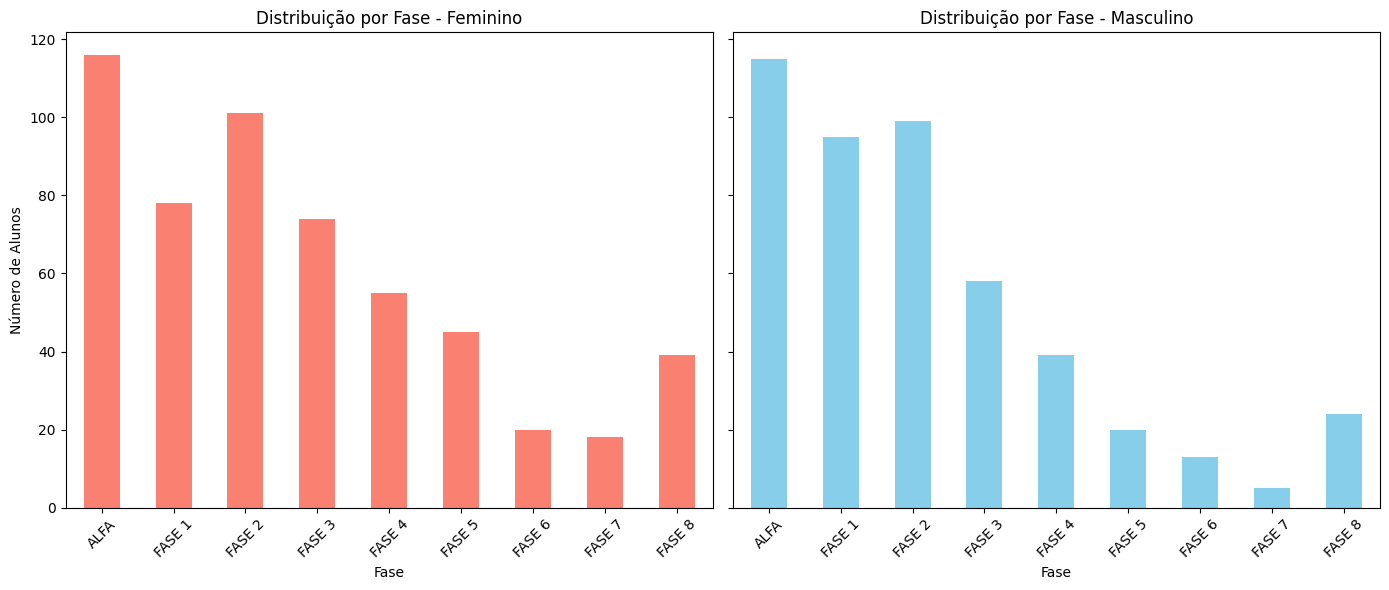

In [717]:
#grafico de distribuição por sexo e fase


# 1. Preparação dos Dados
df_grouped = df_2023.groupby(['Fase', 'Gênero']).size().unstack(fill_value=0)

# 2. Criação dos Gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Criar 2 subplots, compartilhando o mesmo eixo y
generos = df_grouped.columns

# Plotar um gráfico para cada gênero
for i, genero in enumerate(generos):
    ax = axes[i]
    df_grouped[genero].plot(kind='bar', ax=ax, color='skyblue' if genero == 'Masculino' else 'salmon') # Definir cores diferentes para cada gênero
    ax.set_title(f'Distribuição por Fase - {genero}')
    ax.set_xlabel('Fase')
    ax.set_ylabel('Número de Alunos')
    ax.tick_params(axis='x', rotation=45) # Rotacionar os labels do eixo x para melhor leitura

# Ajuste de Layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [718]:
df_2023['Gênero'].value_counts()

,count
Gênero,
Feminino,546
Masculino,468


In [719]:
df_2023.groupby('Gênero')['Fase'].value_counts()

Gênero     Fase  
Feminino   ALFA      116
           FASE 2    101
           FASE 1     78
           FASE 3     74
           FASE 4     55
           FASE 5     45
           FASE 8     39
           FASE 6     20
           FASE 7     18
Masculino  ALFA      115
           FASE 2     99
           FASE 1     95
           FASE 3     58
           FASE 4     39
           FASE 8     24
           FASE 5     20
           FASE 6     13
           FASE 7      5
Name: count, dtype: int64

In [720]:
df_2023['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,809
Privada - Programa de Apadrinhamento,99
Privada *Parcerias com Bolsa 100%,60
Privada,28
Privada - Pagamento por *Empresa Parceira,8
Concluiu o 3º EM,7
Nenhuma das opções acima,2
Privada - Programa de apadrinhamento,1


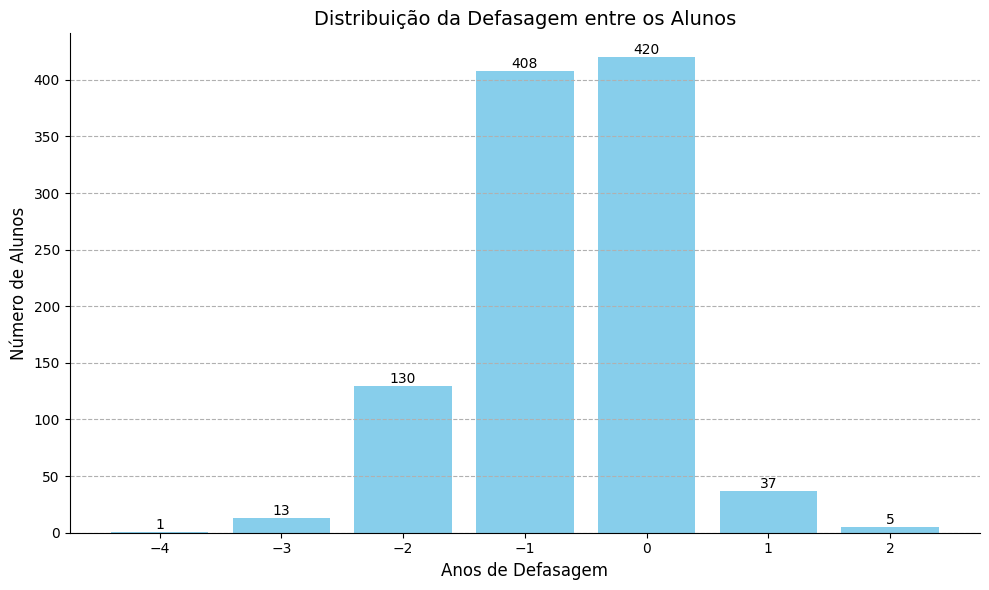

In [721]:
# plotar defasagem entre os alunos


# Contagem dos valores de defasagem
defasagem_counts = df_2023['Defasagem'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
bars = plt.bar(defasagem_counts.index, defasagem_counts.values, color='skyblue') # Plota as barras e guarda o objeto

# Adicionar título e rótulos
plt.title('Distribuição da Defasagem entre os Alunos', fontsize=14)
plt.xlabel('Anos de Defasagem', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)

# Adicionar rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Ajustar os ticks do eixo x para mostrar os valores de defasagem
plt.xticks(defasagem_counts.index)

# Adicionar grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Remover as bordas superior e direita para uma aparência mais limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [722]:
# defasagem de -1
defasagem_2023_1 = df_2023[df_2023['Defasagem'] == -1]

In [723]:
defasagem_2023_1.shape

(408, 48)

In [724]:
defasagem_2023_1['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,367
Privada - Programa de Apadrinhamento,24
Privada,11
Concluiu o 3º EM,3
Nenhuma das opções acima,2
Privada *Parcerias com Bolsa 100%,1


In [725]:
# defasagem de -2
defasagem_2023_2 = df_2023[df_2023['Defasagem'] == -2]

In [726]:
defasagem_2023_2['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,113
Privada - Programa de Apadrinhamento,9
Privada,4
Concluiu o 3º EM,3
Privada - Programa de apadrinhamento,1


In [727]:
# defasagem de -3
defasagem_2023_3 = df_2023[df_2023['Defasagem'] == -3]

In [728]:
defasagem_2023_3['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,13


In [729]:
df_2023[df_2023['Defasagem'] == -4]

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
823,RA-287,FASE 4,3.745542,Quartzo,4N,Aluno-287,7/13/2005,18,Feminino,2022,Pública,NaN,NaN,Quartzo,NaN,3.7,NaN,NaN,NaN,NaN,4.0,Avaliador-21,NaN,Avaliador-6,NaN,Avaliador-23,NaN,Avaliador-8,NaN,0.0,4.8,2.52,4.21875,NaN,3.9,3.0,2.3,6.5,NaN,NaN,5.375,2.5,Fase 8 (Universitários),-4,NaN,NaN,NaN,NaN


In [730]:
#média do INDE POR FASE
df_2023.groupby('Fase')['INDE 2023'].mean()

,INDE 2023
Fase,
ALFA,7.679521
FASE 1,7.452116
FASE 2,7.371558
FASE 3,6.966130
FASE 4,7.072079
FASE 5,6.867291
FASE 6,7.243017
FASE 7,7.829890
FASE 8,NaN


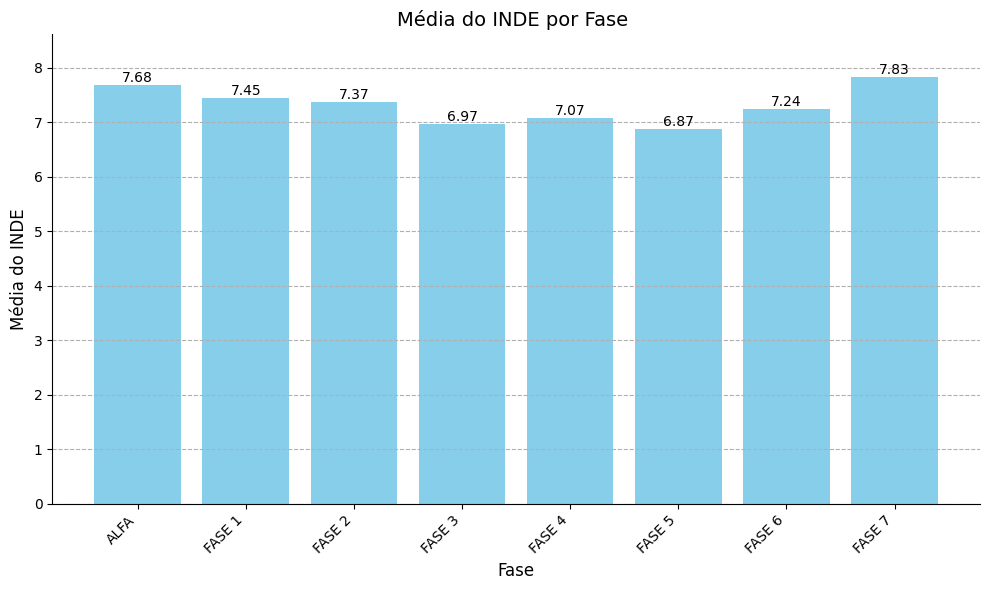

In [731]:

# Calcula a média do INDE por Fase
inde_por_fase = df_2023.groupby('Fase')['INDE 2023'].mean()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
bars = plt.bar(inde_por_fase.index, inde_por_fase.values, color='skyblue')

# Adiciona título e rótulos
plt.title('Média do INDE por Fase ', fontsize=14)
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Média do INDE', fontsize=12)

# Adiciona rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10) # Arredonda para 2 casas decimais

# Rotaciona os rótulos do eixo x se necessário
plt.xticks(rotation=45, ha='right')  # Melhora a legibilidade se as fases forem nomes longos

# Adiciona grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Define os limites do eixo y para melhor visualização
plt.ylim(0, inde_por_fase.max() * 1.1) # Deixa um espaço acima da barra mais alta

# Remove as bordas superior e direita para uma aparência mais limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajusta layout para evitar cortes
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [732]:
#média do INDE por sexo
df_2023.groupby('Gênero')['INDE 2023'].mean()

,INDE 2023
Gênero,
Feminino,7.408068
Masculino,7.268611


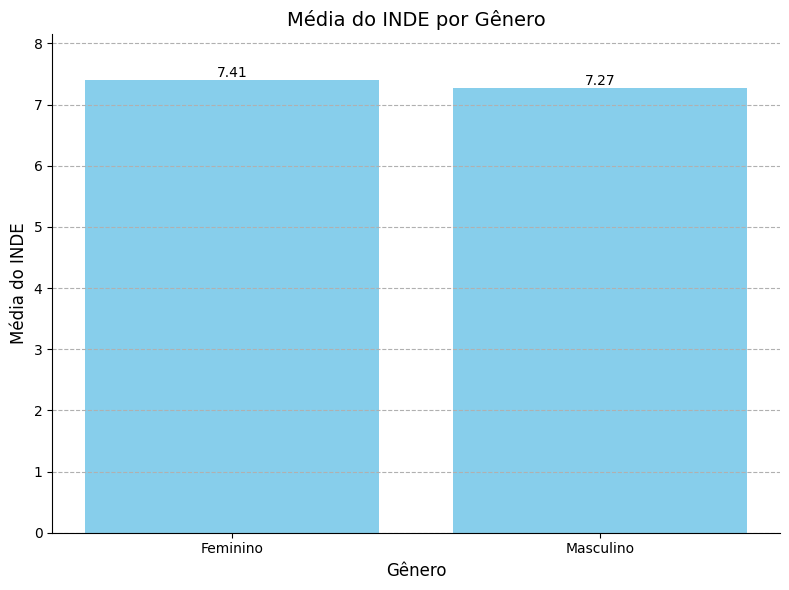

In [733]:
# plotar média do inde por sexo

# Calcula a média do INDE por Gênero
inde_por_genero = df_2023.groupby('Gênero')['INDE 2023'].mean()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura
bars = plt.bar(inde_por_genero.index, inde_por_genero.values, color='skyblue')

# Adiciona título e rótulos
plt.title('Média do INDE por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média do INDE', fontsize=12)

# Adiciona rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Ajusta os limites do eixo Y para melhor visualização
plt.ylim(0, inde_por_genero.max() * 1.1)

# Adiciona grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Remove as bordas superior e direita para uma aparência mais limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

# DF 2024

In [734]:
df_2024.shape

(1156, 50)

In [735]:
df_2024_ingressantes_2023 = df_2024.loc[df_2024['Ano ingresso'] == 2023]

In [736]:
df_2024_ingressantes_2023.shape

(248, 50)

In [737]:
df_2024['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,913
Privada - Programa de Apadrinhamento,95
Privada,76
Privada *Parcerias com Bolsa 100%,41
Bolsista Universitário *Formado (a),13
Privada - Pagamento por *Empresa Parceira,9
Concluiu o 3º EM,7
Privada - Programa de apadrinhamento,1


In [738]:
df_2024['Fase'].unique()

array(['ALFA', '1A', '1B', '1C', '1D', '1E', '1G', '1H', '1J', '1K', '1L',
       '1M', '1N', '1P', '1R', '2A', '2B', '2C', '2D', '2G', '2H', '2I',
       '2K', '2L', '2M', '2N', '2P', '2R', '2U', '3A', '3B', '3C', '3D',
       '3F', '3G', '3H', '3I', '3K', '3L', '3M', '3N', '3P', '3R', '3U',
       '4A', '4B', '4C', '4F', '4H', '4L', '4M', '4N', '4R', '5A', '5B',
       '5C', '5D', '5F', '5G', '5L', '5M', '5N', '6A', '6L', '7A', '7E',
       '8A', '8B', '8D', '8E', '8F', 9], dtype=object)

In [739]:
df_fases = df_2024.loc[df_2024['Fase'] != 'ALFA']

In [740]:
df_fases = df_fases.loc[df_fases['Fase'] != 9]

In [741]:
# separar FASE de TURMA em Fase
import re

def extrair_fase_turma_simplificado(texto):
 # Extrai a fase e a turma de um texto como '2H'
  match = re.match(r'(\d+)([A-Z])', texto)
  if match:
    fase = int(match.group(1))
    turma = match.group(2)
    return fase, turma
  else:
      return None, None


# Aplica a função a cada linha da coluna 'FASE_TURMA_2020'
df_fases[['FASE_2024', 'TURMA_2024']] = df_fases['Fase'].apply(lambda x: pd.Series(extrair_fase_turma_simplificado(x)))

# Imprime o DataFrame com as novas colunas
df_fases[['FASE_2024', 'TURMA_2024']]

,FASE_2024,TURMA_2024
196,1,A
197,1,A
198,1,A
199,1,A
200,1,A
...,...,...
1113,8,F
1114,8,F
1115,8,F
1116,8,F


In [742]:
df_fases['FASE_2024'].value_counts()

,count
FASE_2024,
3,211
1,185
2,185
4,115
5,100
8,64
7,37
6,25


In [743]:
df_fases.loc[df_fases['FASE_2024'] == 8]

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1,FASE_2024,TURMA_2024
1054,RA-1236,8A,NaN,NaN,8A,Aluno-1236,2002-01-16 02:00:00,22,Feminino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Universidade Santo Amaro (UNISA),Cursando,Cursando,8,A
1055,RA-1234,8A,NaN,NaN,8A,Aluno-1234,2002-12-03 02:00:00,21,Feminino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Universidade Santo Amaro (UNISA),Cursando,Cursando,8,A
1056,RA-1633,8B,NaN,NaN,8B,Aluno-1633,2003-03-16 03:00:00,21,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Unicamp,Cursando,Cursando,8,B
1057,RA-1248,8B,NaN,NaN,8B,Aluno-1248,2003-01-13 00:00:00,21,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Universidade Santo Amaro (UNISA),Cursando,Cursando,8,B
1058,RA-1246,8B,NaN,NaN,8B,Aluno-1246,2003-05-16 03:00:00,21,Feminino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Universidade Santo Amaro (UNISA),Cursando,Cursando,8,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,RA-62,8F,NaN,NaN,8F,Aluno-62,2005-12-31 00:00:00,18,Feminino,2022,Privada *Parcerias com Bolsa 100%,NaN,NaN,Ametista,Ametista,7.891451,7.610333,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Universidade Estácio de Sá,Cursando,Cursando,8,F
1114,RA-173,8F,NaN,NaN,8F,Aluno-173,2005-11-16 00:00:00,18,Masculino,2021,Privada *Parcerias com Bolsa 100%,Ametista,Ametista,Ametista,Ametista,7.815768,7.757467,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Faculdade FIAP,Cursando,Cursando,8,F
1115,RA-38,8F,NaN,NaN,8F,Aluno-38,2005-12-23 00:00:00,18,Feminino,2021,Privada - Programa de Apadrinhamento,Ametista,Ametista,Topázio,Topázio,8.523222,8.835333,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Universidade Santo Amaro (UNISA),Cursando,Cursando,8,F
1116,RA-1224,8F,NaN,NaN,8F,Aluno-1224,2003-09-01 03:00:00,21,Masculino,2023,Concluiu o 3º EM,NaN,NaN,NaN,Ametista,NaN,7.552400,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Concluiu o 3º EM,Cursando,Cursando,8,F


In [744]:
df_2024['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,913
Privada - Programa de Apadrinhamento,95
Privada,76
Privada *Parcerias com Bolsa 100%,41
Bolsista Universitário *Formado (a),13
Privada - Pagamento por *Empresa Parceira,9
Concluiu o 3º EM,7
Privada - Programa de apadrinhamento,1


In [745]:
df_2024['Gênero'].value_counts()

,count
Gênero,
Feminino,623
Masculino,533


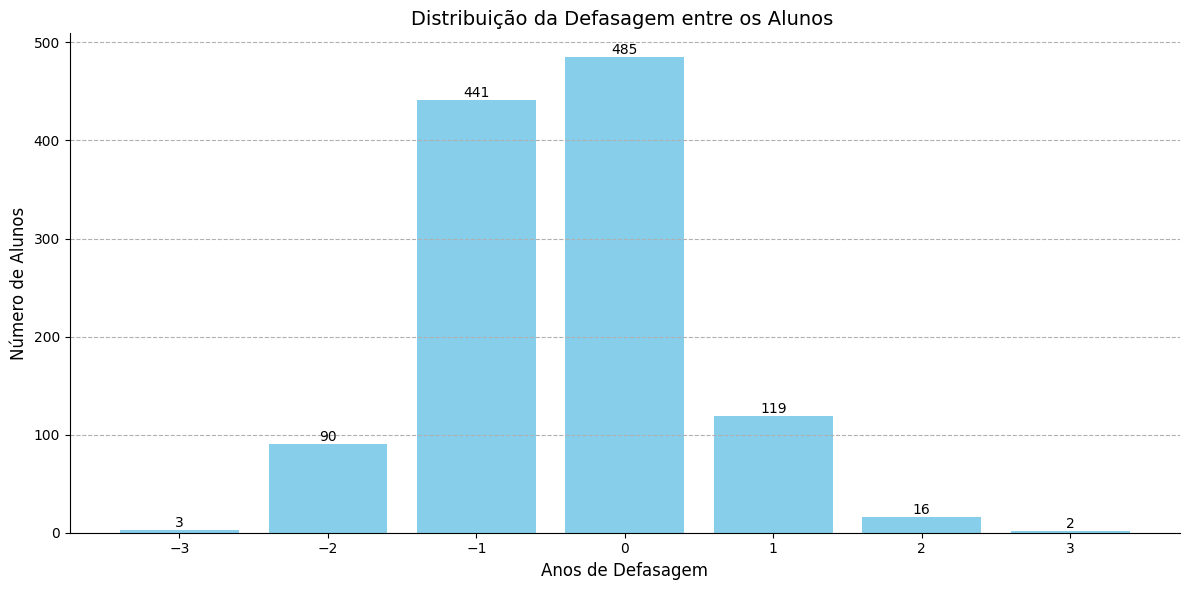

In [746]:
# plotar defasagem entre os alunos


# Contagem dos valores de defasagem
defasagem_counts = df_2024['Defasagem'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
bars = plt.bar(defasagem_counts.index, defasagem_counts.values, color='skyblue') # Plota as barras e guarda o objeto

# Adicionar título e rótulos
plt.title('Distribuição da Defasagem entre os Alunos ', fontsize=14)
plt.xlabel('Anos de Defasagem', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)

# Adicionar rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Ajustar os ticks do eixo x para mostrar os valores de defasagem
plt.xticks(defasagem_counts.index)

# Adicionar grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Remover as bordas superior e direita para uma aparência mais limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [747]:
# defasagem de 1 ano
defasagem_2024_1 = df_2024[df_2024['Defasagem'] == -1]

In [748]:
defasagem_2024_1['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,420
Privada,9
Privada - Programa de Apadrinhamento,9
Concluiu o 3º EM,2
Privada - Programa de apadrinhamento,1


In [749]:
# defasagem de 2 ano
defasagem_2024_2 = df_2024[df_2024['Defasagem'] == -2]


In [750]:
defasagem_2024_2['Instituição de ensino'].value_counts()

,count
Instituição de ensino,
Pública,85
Privada,3
Concluiu o 3º EM,2


In [751]:
df_2024[df_2024['Defasagem'] == -3]

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
571,RA-1143,3A,5.881226,Quartzo,3A,Aluno-1143,2008-04-30,16,Feminino,2021,Pública,NaN,NaN,NaN,Agata,NaN,6.445933,NaN,NaN,NaN,4,Avaliador-21,NaN,Avaliador-26,NaN,Avaliador-23,Avaliador-5,NaN,NaN,9.585,5.201337,9.380,7.03125,NaN,3.166667,3.0,6.5,0.0,NaN,NaN,6.790,2.5,Fase 6 (2° EM),-3,NaN,NaN,NaN,EE Joaquim Mendes Feliz,Cursando,Cursando
733,RA-304,3N,6.852411,Agata,3N,Aluno-304,2007-12-02,16,Masculino,2021,Pública,Ametista,Ágata,Ágata,Agata,6.355208,6.241583,NaN,NaN,NaN,2,Avaliador-21,NaN,Avaliador-23,NaN,NaN,NaN,NaN,NaN,10.002,7.826891,7.510,6.87500,NaN,7.166667,9.0,5.5,7.0,NaN,NaN,5.825,2.5,Fase 6 (2° EM),-3,NaN,NaN,NaN,EE Maria André Schunck Dona,Cursando,Cursando
823,RA-239,4F,6.782181,Agata,4F,Aluno-239,2007-05-22,17,Feminino,2021,Pública,NaN,Quartzo,Quartzo,Agata,4.571674,6.411333,NaN,NaN,NaN,5,Avaliador-22,NaN,Avaliador-17,NaN,Avaliador-1,Avaliador-5,Avaliador-26,NaN,8.751,6.361738,5.635,7.87500,NaN,6.666667,4.0,10.0,6.0,NaN,NaN,8.502,2.5,Fase 7 (3° EM),-3,NaN,NaN,NaN,EE Paschoal Carlos Magno,Cursando,Cursando


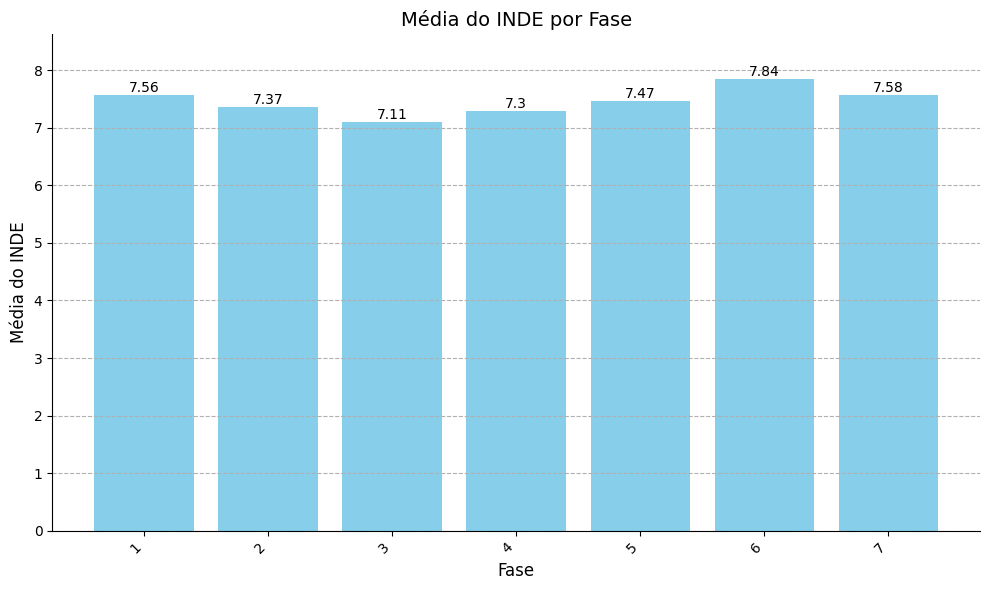

In [752]:

# Calcula a média do INDE por Fase
inde_por_fase = df_fases.groupby('FASE_2024')['INDE 2024'].mean()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
bars = plt.bar(inde_por_fase.index, inde_por_fase.values, color='skyblue')

# Adiciona título e rótulos
plt.title('Média do INDE por Fase', fontsize=14)
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Média do INDE', fontsize=12)

# Adiciona rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10) # Arredonda para 2 casas decimais

# Rotaciona os rótulos do eixo x se necessário
plt.xticks(rotation=45, ha='right')  # Melhora a legibilidade se as fases forem nomes longos

# Adiciona grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Define os limites do eixo y para melhor visualização
plt.ylim(0, inde_por_fase.max() * 1.1) # Deixa um espaço acima da barra mais alta

# Remove as bordas superior e direita para uma aparência mais limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajusta layout para evitar cortes
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [753]:
# média do inde por fase ALFA
df_alfa = df_2024[df_2024['Fase'] == 'ALFA']

In [754]:
df_alfa.groupby('Fase')['INDE 2024'].mean()

,INDE 2024
Fase,
ALFA,7.50212


In [755]:
# média do inde por fase 8
df_8= df_2024[df_2024['Fase'] == 8]

In [756]:
df_2024['INDE 2024'].unique()

array([7.611366666700001, 8.002866666700001, 7.952200000100001, ...,
       7.7887, nan, 'INCLUIR'], dtype=object)

In [757]:
df_2024.loc[df_2024['INDE 2024'] == 'INCLUIR']

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
1118,RA-1637,9,INCLUIR,INCLUIR,9,Aluno-1637,2001-07-23 03:00:00,23,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando
1119,RA-1638,9,INCLUIR,INCLUIR,9,Aluno-1638,2002-01-25 02:00:00,22,Feminino,2021,Bolsista Universitário *Formado (a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Bolsista Universitário *Formado (a),Cursando,Cursando
1120,RA-1268,9,INCLUIR,INCLUIR,9,Aluno-1268,2004-05-17 00:00:00,20,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando
1121,RA-1260,9,INCLUIR,INCLUIR,9,Aluno-1260,2004-05-08 03:00:00,20,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando
1122,RA-1639,9,INCLUIR,INCLUIR,9,Aluno-1639,2003-02-05 02:00:00,21,Masculino,2021,Bolsista Universitário *Formado (a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Bolsista Universitário *Formado (a),Cursando,Cursando
1123,RA-1640,9,INCLUIR,INCLUIR,9,Aluno-1640,2001-02-26 03:00:00,23,Feminino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Universidade Estácio de Sá,Cursando,Cursando
1124,RA-1641,9,INCLUIR,INCLUIR,9,Aluno-1641,2002-12-23 02:00:00,21,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Universidade Santo Amaro (UNISA),Cursando,Cursando
1125,RA-1266,9,INCLUIR,INCLUIR,9,Aluno-1266,2004-04-06 03:00:00,20,Feminino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando
1126,RA-1642,9,INCLUIR,INCLUIR,9,Aluno-1642,2001-03-18 03:00:00,23,Masculino,2021,Bolsista Universitário *Formado (a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Bolsista Universitário *Formado (a),Cursando,Cursando
1127,RA-1258,9,INCLUIR,INCLUIR,9,Aluno-1258,1998-12-24 02:00:00,25,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando


In [758]:
# dropar aluno que tem o INCLUIR no inde
df_2024 = df_2024.drop(df_2024[df_2024['INDE 2024'] == 'INCLUIR'].index)

In [759]:
# Calcula a média do INDE por Gênero
inde_por_genero = df_2024.groupby('Gênero')['INDE 2024'].mean()

#

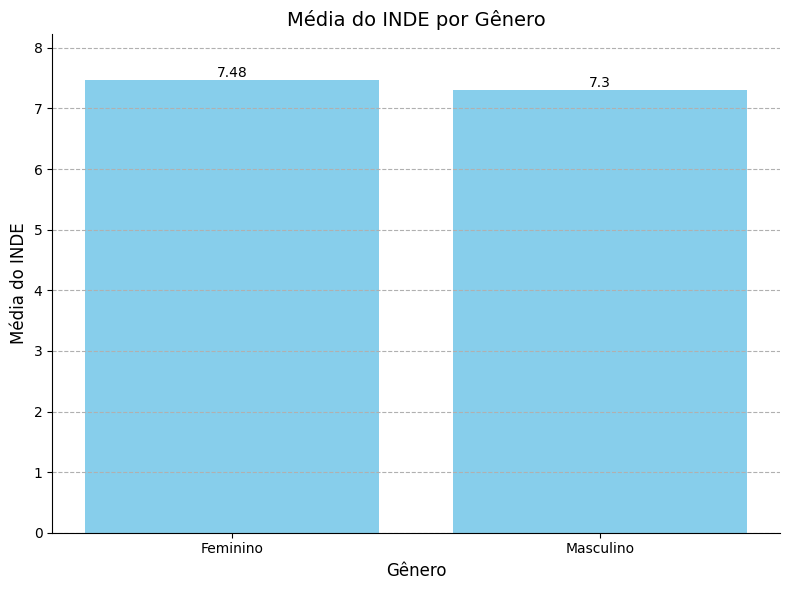

In [760]:
# plotar média do inde por sexo

# Calcula a média do INDE por Gênero
inde_por_genero = df_2024.groupby('Gênero')['INDE 2024'].mean()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura
bars = plt.bar(inde_por_genero.index, inde_por_genero.values, color='skyblue')

# Adiciona título e rótulos
plt.title('Média do INDE por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média do INDE', fontsize=12)

# Adiciona rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Ajusta os limites do eixo Y para melhor visualização
plt.ylim(0, inde_por_genero.max() * 1.1)

# Adiciona grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Remove as bordas superior e direita para uma aparência mais limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

# Trabalhando com Dados brutos
#### link: https://drive.google.com/file/d/1CqQLozHeilyxzvGvvMi29Dbzl3t66wik/view?usp=drive_link

###Base de dados dos alunos

In [761]:
# Enquanto trabalhavamos com os dados anteriormente exportados, dentro do Power BI, identificamos que havia a necessidade de se utilizar mais algumas
#bases auxiliares para elaborarmos os dashboards e nossas análises, portanto importamos a base de dados dos alunos e iniciamos as respectivas tratativas

file_path = '/content/TbAluno.csv'
pd.set_option('display.max_columns', None)
base_alunos = pd.read_csv(file_path, delimiter=',')

In [762]:
base_alunos.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,IdTipoResponsavel,Naturalidade,Nacionalidade,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,CorRaca,StDeficienciaCegueira,StDeficienciaBaixaVisao,StDeficienciaSurdez,StDeficienciaAuditiva,StDeficienciaFisica,StDeficienciaSurdoCegueira,StDeficienciaMultipla,StDeficienciaMental,_IdResponsavel_CadastroVinculado,StFalecido,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,StDeficienciaAutismoInfantil,StDeficienciaSindromeAsperger,StDeficienciaSindromeRett,StDeficienciaTrastornoDesintegrativo,StDeficienciaAltasHabilidades,NomeCivil,StAppComunicacao_Sincronizado,IdTipoResponsavelPai,IdTipoResponsavelMae,StRecursoAuxilioLedor,StRecursoAuxilioTranscricao,StRecursoGuiaInterprete,StRecursoTradutorInterpreteDeLibras,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
0,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,4,Aluno 2,NaN,1.0,F,5.0,2004-11-04 02:00:00,6.0,NaN,6.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,5,Aluno 3,NaN,1.0,F,5.0,2002-01-25 02:00:00,NaN,NaN,7.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,6,Aluno 4,NaN,1.0,M,5.0,2002-10-07 03:00:00,NaN,8,8.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
4,7,Aluno 5,NaN,1.0,M,5.0,2002-12-23 02:00:00,NaN,9,9.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN


In [763]:
# Caracterizando o tipo de informação nas colunas

base_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IdAluno                                 2238 non-null   int64  
 1   NomeAluno                               2238 non-null   object 
 2   NomeAbreviado                           0 non-null      float64
 3   IdUnidade                               2237 non-null   float64
 4   Sexo                                    2237 non-null   object 
 5   EstadoCivil                             2237 non-null   float64
 6   DataNascimento                          2238 non-null   object 
 7   IdPai                                   800 non-null    float64
 8   IdMae                                   1218 non-null   object 
 9   IdResponsavel                           2237 non-null   float64
 10  IdTipoResponsavel                       2238 non-null   int6

In [764]:
# Estatística básica das informações numéricas presentes na base de dados

base_alunos.describe()

,IdAluno,NomeAbreviado,IdUnidade,EstadoCivil,IdPai,IdResponsavel,IdTipoResponsavel,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,EnsinoMedio_IdEstabelecimentoEnsino,NomeCivil,IdTipoResponsavelMae
count,2238.000000,0.0,2237.0,2237.000000,800.00000,2237.00000,2238.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.000000
mean,1130.315013,NaN,1.0,4.557443,1325.89250,855.88869,3.138070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.106250
std,654.486109,NaN,0.0,1.420504,382.61047,522.88275,14.478266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306465
min,3.000000,NaN,1.0,0.000000,4.00000,4.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,563.250000,NaN,1.0,5.000000,1203.75000,392.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,1125.500000,NaN,1.0,5.000000,1408.50000,855.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,1699.750000,NaN,1.0,5.000000,1595.25000,1323.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
max,2262.000000,NaN,1.0,5.000000,1770.00000,1770.00000,676.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000


In [765]:
alunos = base_alunos

alunos.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,IdTipoResponsavel,Naturalidade,Nacionalidade,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,CorRaca,StDeficienciaCegueira,StDeficienciaBaixaVisao,StDeficienciaSurdez,StDeficienciaAuditiva,StDeficienciaFisica,StDeficienciaSurdoCegueira,StDeficienciaMultipla,StDeficienciaMental,_IdResponsavel_CadastroVinculado,StFalecido,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,StDeficienciaAutismoInfantil,StDeficienciaSindromeAsperger,StDeficienciaSindromeRett,StDeficienciaTrastornoDesintegrativo,StDeficienciaAltasHabilidades,NomeCivil,StAppComunicacao_Sincronizado,IdTipoResponsavelPai,IdTipoResponsavelMae,StRecursoAuxilioLedor,StRecursoAuxilioTranscricao,StRecursoGuiaInterprete,StRecursoTradutorInterpreteDeLibras,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
0,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,4,Aluno 2,NaN,1.0,F,5.0,2004-11-04 02:00:00,6.0,NaN,6.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,5,Aluno 3,NaN,1.0,F,5.0,2002-01-25 02:00:00,NaN,NaN,7.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,6,Aluno 4,NaN,1.0,M,5.0,2002-10-07 03:00:00,NaN,8,8.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
4,7,Aluno 5,NaN,1.0,M,5.0,2002-12-23 02:00:00,NaN,9,9.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN


In [766]:
# Devido ao grande número de colunas que há nessa tabela, puxamos os nomes delas numa lista para podermos avaliar o que realmente
#precisaremos de informação e que poderemos já remover ou tratar aqui na base


alunos.columns

Index(['IdAluno', 'NomeAluno', 'NomeAbreviado', 'IdUnidade', 'Sexo',
       'EstadoCivil', 'DataNascimento', 'IdPai', 'IdMae', 'IdResponsavel',
       'IdTipoResponsavel', 'Naturalidade', 'Nacionalidade', 'TipoSangue',
       'PlanoSaude', 'Alergia', 'Medicamento',
       'IdEstabelecimentoEnsinoAnterior', 'IdReligiao', 'AnoConclusao',
       'CorRaca', 'StDeficienciaCegueira', 'StDeficienciaBaixaVisao',
       'StDeficienciaSurdez', 'StDeficienciaAuditiva', 'StDeficienciaFisica',
       'StDeficienciaSurdoCegueira', 'StDeficienciaMultipla',
       'StDeficienciaMental', '_IdResponsavel_CadastroVinculado', 'StFalecido',
       'EnsinoMedio_IdEstabelecimentoEnsino', 'EnsinoMedio_AnoConclusao',
       'StDeficienciaAutismoInfantil', 'StDeficienciaSindromeAsperger',
       'StDeficienciaSindromeRett', 'StDeficienciaTrastornoDesintegrativo',
       'StDeficienciaAltasHabilidades', 'NomeCivil',
       'StAppComunicacao_Sincronizado', 'IdTipoResponsavelPai',
       'IdTipoResponsavelMae', 'S

In [767]:
# Das informações presentes nessa base de dados, escolhemos trabalhar apenas com as colunas abaixo.
# Elas possuem maior taxa de preenchimento e permitirão orientarmos nossas análises considerando categorias comuns e relevantes

alunos = alunos[['IdAluno', 'NomeAluno','Sexo','DataNascimento',"CorRaca"]]
alunos.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca
0,3,Aluno 1,F,2005-03-29 03:00:00,R
1,4,Aluno 2,F,2004-11-04 02:00:00,B
2,5,Aluno 3,F,2002-01-25 02:00:00,B
3,6,Aluno 4,M,2002-10-07 03:00:00,R
4,7,Aluno 5,M,2002-12-23 02:00:00,R


In [768]:
# Tendo em vista que um componente em comum entre todas as bases de dados são os alunos e o objetivo do grupo é realizar análises em função dos alunos,
#suas performances, características e afins, optamos por combinar as consultas em uma única tabela, unindo 2020-2021-2022 de forma a facilitar as
#projeções de gráficos e análises do dashboard.

# Para esse fim, a primeira etapa foi de garantir que haja 1 linha por ano para cada aluno, independente de se ele apresentou nota ou não no respectivo
#ano, pois esses valores em branco serão filtrados em outro momento tratando os dados

anos = [2020, 2021, 2022]

# Após criar a lista de anos, repliquei as linhas dos alunos para cada ano, assim garantindo que todas as datas estariam no dataframe
alunos_anos = alunos.loc[alunos.index.repeat(len(anos))]
alunos_anos["Ano"] = anos * len(alunos)

alunos_anos.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2021
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2022
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2020
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2021


In [769]:
# O intuito é combinar as tabelas, mas para isso preciso garantir que haja um campo em comum (mesma escrita e formato de texto) para usar de referência
#e buscar a informação nas outras tabelas, então foi criada uma coluna nome_id contendo o termo aluno, seu número e o ano da linha, tudo sem espaçamento,
#separado por - e em letras minúsculas

alunos_anos["nome_id"] = alunos_anos["NomeAluno"].str.lower().str.replace(" ", "-").str.cat(alunos_anos["Ano"].astype(str),sep="-")
alunos_anos.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano,nome_id
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020,aluno-1-2020
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2021,aluno-1-2021
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2022,aluno-1-2022
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2020,aluno-2-2020
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2021,aluno-2-2021


In [770]:
# Com o "índice" já criado no que será minha tabela principal, preciso garantir que o mesmo padrão de nome seja seguido nas tabelas secundárias,
#logo, seguimos a mesma lógica para garantir que haja colunas correspondentes nos df_ano que havíamos criado anteriormente com auxílio do código
#da FIAP

df_2020_ano = df_2020
df_2020_ano["FASE_2020"] = df_2020_ano["FASE_TURMA_2020"].str[0]
df_2020_ano["ano"] = 2020
df_2020_ano["nome_id"] = df_2020_ano["NOME"].str.lower().str.replace(" ", "-") + "-2020"

df_2021_ano = df_2021
df_2021_ano["ano"] = 2021
df_2021_ano["nome_id"] = df_2021_ano["NOME"].str.lower().str.replace(" ", "-") + "-2021"

df_2022_ano = df_2022
df_2022_ano["ano"] = 2022
df_2022_ano["nome_id"] = df_2022_ano["NOME"].str.lower().str.replace(" ", "-") + "-2022"

In [771]:
# Utilizando as colunas índices, as tabelas foram mescladas

alunos_completo = alunos_anos.merge(df_2020_ano.assign(Ano = 2020), on=["nome_id"], how="left")
alunos_completo = alunos_completo.merge(df_2021_ano.assign(Ano_x = 2021), on=["nome_id"], how="left")
alunos_completo = alunos_completo.merge(df_2022_ano.assign(Ano_x_x = 2022), on=["nome_id"], how="left")
alunos_completo.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano_x_x_x,nome_id,INSTITUICAO_ENSINO_ALUNO_2020,NOME_x,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020_TRATADO,IAA_2020_TRATADO,IPS_2020_TRATADO,IDA_2020_TRATADO,IPP_2020_TRATADO,IPV_2020_TRATADO,FASE_2020,TURMA_2020,ano_x,Ano_y,NOME_y,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,INDE_2021_TRATADO,ano_y,Ano_x_y,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,INDE_2022_TRATADO,IAA_2022_TRATADO,IEG_2022_TRATADO,IPS_2022_TRATADO,IDA_2022_TRATADO,NOTA_PORT_2022_TRATADO,NOTA_MAT_2022_TRATADO,NOTA_ING_2022_TRATADO,IPP_2022_TRATADO,IPV_2022_TRATADO,ano,Ano_x_x_y
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020,aluno-1-2020,Escola Pública,ALUNO-1,11.0,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.9,8.50,7.50,7.00,5.94,7.75,2,2H,2020.0,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Aluno 1,F,2005-03-29 03:00:00,R,2021,aluno-1-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,7.3,2021.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Aluno 1,F,2005-03-29 03:00:00,R,2022,aluno-1-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Aluno 2,F,2004-11-04 02:00:00,B,2020,aluno-2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aluno 2,F,2004-11-04 02:00:00,B,2021,aluno-2-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [772]:
# O conjunto de dados ficou com uma lista consideravelmente grande de nomes, então eles foram listados na lista abaixo de forma a facilitar a identificação
#do que iremos querer trabalhar com e podermos excluir as outras colunas desnecessárias

alunos_completo.columns

Index(['IdAluno', 'NomeAluno', 'Sexo', 'DataNascimento', 'CorRaca',
       'Ano_x_x_x', 'nome_id', 'INSTITUICAO_ENSINO_ALUNO_2020', 'NOME_x',
       'IDADE_ALUNO_2020',
       ...
       'IEG_2022_TRATADO', 'IPS_2022_TRATADO', 'IDA_2022_TRATADO',
       'NOTA_PORT_2022_TRATADO', 'NOTA_MAT_2022_TRATADO',
       'NOTA_ING_2022_TRATADO', 'IPP_2022_TRATADO', 'IPV_2022_TRATADO', 'ano',
       'Ano_x_x_y'],
      dtype='object', length=103)

In [773]:
# Identificando as colunas chave que serão usadas para analisar o conjunto, criamos novas colunas na base em que compactaríamos as informações de todos
#os anos nas mesmas colunas, realizando o mesmo processo para cada critério mesclando seus conteúdos pelos correspondentes anos, nomes, etc

alunos_completo["Fase"] = alunos_completo["FASE_2020"].combine_first(alunos_completo["FASE_2021"].combine_first(alunos_completo["FASE_2022"]))

alunos_completo["Pedra"] = alunos_completo["PEDRA_2020"].combine_first(alunos_completo["PEDRA_2021"].combine_first(alunos_completo["PEDRA_2022"]))

alunos_completo["IAA"] = alunos_completo["IAA_2020"].combine_first(alunos_completo["IAA_2021"].combine_first(alunos_completo["IAA_2022"]))

alunos_completo["IAN"] = alunos_completo["IAN_2020"].combine_first(alunos_completo["IAN_2021"].combine_first(alunos_completo["IAN_2022"]))

alunos_completo["IDA"] = alunos_completo["IDA_2020"].combine_first(alunos_completo["IDA_2021"].combine_first(alunos_completo["IDA_2022"]))

alunos_completo["IEG"] = alunos_completo["IEG_2020"].combine_first(alunos_completo["IEG_2021"].combine_first(alunos_completo["IEG_2022"]))

alunos_completo["INDE"] = alunos_completo["INDE_2020"].combine_first(alunos_completo["INDE_2021"].combine_first(alunos_completo["INDE_2022"]))

alunos_completo["IPP"] = alunos_completo["IPP_2020"].combine_first(alunos_completo["IPP_2021"].combine_first(alunos_completo["IPP_2022"]))

alunos_completo["IPS"] = alunos_completo["IPS_2020"].combine_first(alunos_completo["IPS_2021"].combine_first(alunos_completo["IPS_2022"]))

alunos_completo["IPV"] = alunos_completo["IPV_2020"].combine_first(alunos_completo["IPV_2021"].combine_first(alunos_completo["IPV_2022"]))



In [774]:
# Para isolar essas colunas novas criadas no conteudo de interesse para trabalho, foi criado um novo dataframe para continuar a ser editado, sem perder
#nenhuma informação

alunos_merged = alunos_completo[['IdAluno', 'NomeAluno', 'Sexo', 'DataNascimento', 'CorRaca', 'Ano_x_x_x','nome_id', "Fase","Pedra","IAA","IAN","IDA","IEG","INDE","IPP","IPS","IPV"]]

In [775]:
# Foi corrigido o nome da coluna Ano por um nome mais intuitivo e exibida a tabela para confirmar o resultado

alunos_merged.rename(columns={"Ano_x_x_x":"Ano"}, inplace=True)
alunos_merged.head()

<ipython-input-775-5c530c6f6abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_merged.rename(columns={"Ano_x_x_x":"Ano"}, inplace=True)


,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano,nome_id,Fase,Pedra,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020,aluno-1-2020,2,Ametista,8.500020000000001,10,7,8.7,7.883752,5.9375,7.5,7.75
1,3,Aluno 1,F,2005-03-29 03:00:00,R,2021,aluno-1-2021,2.0,Ametista,7.5,5.0,8.8,6.3,7.319,7.7,6.9,8.1
2,3,Aluno 1,F,2005-03-29 03:00:00,R,2022,aluno-1-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Aluno 2,F,2004-11-04 02:00:00,B,2020,aluno-2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aluno 2,F,2004-11-04 02:00:00,B,2021,aluno-2-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [776]:
# Como a base final atingiu o desejado, essa base foi extraída para ser importada no power BI posteriormente e ser trabalhada na query, de lá, para
#para gerar as exibições desejadas

alunos_merged.to_csv("alunos_merged.csv", index = False)



```
# Ass: Jhonny Amorim  
       Gabriel Ferreira
       
Pós Graduandos em Análise de Dados na FIAP
```

